### <div style="color: Green; font-size: 35px;">Problem statement</div><div style=" font-size: 20px;"><li>To build a predictive models to identify customers at high risk of churn and identify the main indicators of churn.</li><li>To define churn based on usage. i.e. customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.</li><li>To define high-value customers based on a certain metric and predict churn only on high-value customers.</li><li>**The Business objective** is to predict the churn in the last month using the data from the first three months.</li>

### Process Flow Diagram


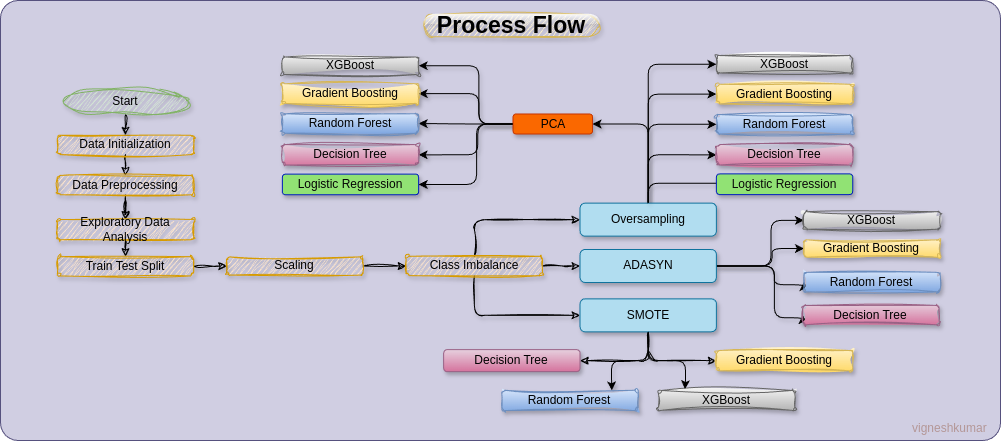

### Initialization

##### <div style="color: #1B5AF4; font-size: 20px;"> 1. Import all necessary libraries. </br> &nbsp;&nbsp;&nbsp;&nbsp;LogisticRegression, Decision Tree classifier, Random Forest, RFE and PCA packages etc

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

# Set custom display properties in pandas
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 900) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [38]:
# %pip install fast_ml    ## Required for constant feature identification package

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

import xgboost as xgb
import statsmodels.api as sm
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA, IncrementalPCA 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, f1_score, classification_report, accuracy_score

##### <div style="color: #1B5AF4; font-size: 20px;"> 2. Initialize the telecom_churn dataset

In [39]:
telecom_df = pd.read_csv("./telecom_churn_data.csv")
telecom_df.head(2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109           0.000           0.000           0.000   
1     7001865778        109           0.000           0.000           0.000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014 197.385 214.816 213.803  21.100          NaN   
1            9/30/2014  34.047 355.074 268.321  86.285       24.110   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN        0.000          NaN           NaN           NaN   
1       78.680        7.680       18.340        15.740        99.840   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         0.000           NaN            NaN            NaN          0.000   
1       304.760        53.760          0.000          0.000          0.000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN          0.000            NaN   
1          0.000          0.000          0.000          0.000          0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN             0.000               NaN   
1            23.880            74.560             7.680            18.340   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN             0.000               NaN   
1            11.510            75.940           291.860            53.760   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN             0.000               NaN   
1             0.000             0.000             0.000             0.000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN             0.000               NaN   
1             0.000             2.910             0.000             0.000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN         0.000           NaN               NaN   
1        35.390       150.510       299.540        72.110             0.230   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               NaN             0.000               NaN               NaN   
1             4.110             0.000             0.000             0.000   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               NaN             0.000               NaN               NaN   
1             0.460             0.130             0.000             0.000   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0               NaN             0.000               NaN               NaN   
1             0.000             0.000             0.000             0.000   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  \
0               NaN             0.000               NaN           NaN   
1             0.000             0.000             0.000         0.230   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0           NaN         0.000           NaN           NaN           NaN   
1         4.580         0.130         0.000         0.000         0.000   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0         0.000           NaN           NaN           NaN         0.000   
1         0.000         0.000         4.680        23.430        12.760   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
0           NaN          NaN          NaN       

In [40]:
# check columns names and datatype 
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Custom Functions

###### <div style="color: #F46F1A; font-size: 20px;">1. Function Combine_features: </br> The below function combines all the features that are part of "Good phase" by stripping the unique identifiers. </br>It then takes the mean among the same features and finally creating a new derived feature.

In [41]:
def combine_features(df, cols, pat1='_6' , pat2='_7' ,to_append='_good_phase'):
    drop_lst = []
    new_cols = []
    month_col = cols[cols.str.contains(pat='jun_|jul_')].str.replace(pat="(jun_|jul_)", repl="", regex=True).unique()
    cols = cols.str.replace(pat="(_\d$|jun_|jul_)", repl="", regex=True).unique()
    for col in cols:
        if col in month_col:
            new_col = col + to_append
            col1 = 'jun_' + col
            col2 = 'jul_' + col
        else:
            new_col = col + to_append
            col1 = col + pat1
            col2 = col + pat2
            
        df[new_col] = df[[col1, col2]].mean(axis=1) 
        drop_lst.extend([col1,col2])
        new_cols.extend([new_col])
    return drop_lst, new_cols   

###### <div style="color: #F46F1A; font-size: 20px;">2. Function find_outliers </br>Outlier Analysis using Boxplot IQR method.

In [42]:
def find_outliers(df):
    temp_df = pd.DataFrame(columns= ['col', 'lower_threshold', 'iqr_q1', 'iqr', 'iqr_q3', 'upper_threshold', 'outliers_cnt'])
    num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        arr = df[col][df[col].notna()]
        iqr_q3 = np.quantile(df[col], 0.75)
        iqr_q1 = np.quantile(df[col], 0.25)
        
        iqr = iqr_q3 - iqr_q1
        iqr_upper_threshold = iqr_q3 + (1.5 * iqr)
        iqr_lower_threshold = iqr_q1 - (1.5 * iqr)
        
        outliers = arr[(arr > iqr_upper_threshold) | (arr < iqr_lower_threshold)]
        to_add = pd.Series({'col': col, 'lower_threshold': iqr_lower_threshold, 'iqr_q1': iqr_q1, 'iqr': iqr, 'iqr_q3': iqr_q3, 'upper_threshold': iqr_upper_threshold, 'outliers_cnt': len(outliers)})
        temp_df = pd.concat([temp_df,to_add.to_frame().T])
    return temp_df

###### <div style="color: #F46F1A; font-size: 20px;">3. Function check_col_null_pct: </br>Check the columns null percentage and return the columns based on the given threshold value

In [43]:
def check_col_null_pct(df, thresh=0, incl_all=1):
    col_null_pct = (df.isna().sum()/len(df))*100
    cols_na_abv_thresh = col_null_pct[col_null_pct > thresh]
    cols_na_bel_thresh = col_null_pct[col_null_pct < thresh]
    return cols_na_abv_thresh.sort_values(ascending=False) , cols_na_bel_thresh.sort_values(ascending=False)

### Data Preprocessing

##### <div style="color: #1B5AF4; font-size: 20px;"> 3. Check the shape and size of the dataset.

In [44]:
telecom_df.size
telecom_df.shape
telecom_df.columns

22599774

(99999, 226)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

<div style="color: #019900; ">Observation 1:</div> The size of the data set is 22599774 and the data set contains 226 columns altogether. 

##### <div style="color: #1B5AF4; font-size: 20px;"> 4. Check for any duplicate entries in the data set. Also check if there is any duplicates in mobile number column. 

In [45]:
telecom_df[telecom_df.duplicated()]
telecom_df['mobile_number'].is_unique  

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

True

<div style="color: #019900; "> Observation 2:</div> There are no duplicate row entries in the dataset or in mobile number column

##### <div style="color: #1B5AF4; font-size: 20px;"> 5. Check for column null percentage. 

In [46]:
cols_with_gt40_na , cols_with_le40_na = check_col_null_pct(telecom_df, 40)
len(cols_with_gt40_na)

40

<div style="color: #019900; "> Observation 3:</div>  <li>There are 40 columns that have null percentage greater than 40%. Since these columns have high percentage of null values, we decide to drop these features.</li>

In [47]:
telecom_df = telecom_df[cols_with_le40_na.index.sort_values(ascending=True)]
cols_with_le40_na[cols_with_le40_na > 0]

loc_og_t2m_mou_9       7.745
loc_ic_t2m_mou_9       7.745
offnet_mou_9           7.745
std_ic_t2f_mou_9       7.745
roam_ic_mou_9          7.745
std_og_t2t_mou_9       7.745
roam_og_mou_9          7.745
std_ic_t2m_mou_9       7.745
loc_og_t2t_mou_9       7.745
std_ic_t2o_mou_9       7.745
loc_og_mou_9           7.745
std_ic_t2t_mou_9       7.745
isd_og_mou_9           7.745
loc_ic_t2f_mou_9       7.745
loc_og_t2c_mou_9       7.745
loc_og_t2f_mou_9       7.745
loc_ic_t2t_mou_9       7.745
std_og_t2m_mou_9       7.745
spl_ic_mou_9           7.745
std_ic_mou_9           7.745
ic_others_9            7.745
std_og_mou_9           7.745
isd_ic_mou_9           7.745
spl_og_mou_9           7.745
onnet_mou_9            7.745
std_og_t2c_mou_9       7.745
loc_ic_mou_9           7.745
og_others_9            7.745
std_og_t2f_mou_9       7.745
std_og_t2t_mou_8       5.378
std_og_t2c_mou_8       5.378
loc_ic_t2m_mou_8       5.378
loc_ic_t2f_mou_8       5.378
og_others_8            5.378
std_og_t2m_mou

<div style="color: #019900; "> Observation 4:</div> After dropping features that have more than 40% null values. We could see that there are still 126 columns that have some null values. Therefore, we have to impute those missing values. 

In [48]:
telecom_df.head(2)

aon  arpu_6  arpu_7  arpu_8  arpu_9  aug_vbc_3g  circle_id  \
0   968 197.385 214.816 213.803  21.100      30.400        109   
1  1006  34.047 355.074 268.321  86.285       0.000        109   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   

  date_of_last_rech_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  \
0           9/28/2014          NaN          NaN        0.000          NaN   
1           9/30/2014        0.000        0.000        0.000        0.000   

   isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  isd_og_mou_6  \
0           NaN           NaN         0.000           NaN           NaN   
1         1.830         0.000         0.000         0.000         0.000   

   isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  jul_vbc_3g  jun_vbc_3g  \
0           NaN         0.000           NaN       0.000     101.200   
1         0.000         0.000         0.000       0.000       0.000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  last_day_rch_amt_6  last_day_rch_amt_7  \
0            9/30/2014                 252                 252   
1            9/30/2014                  44                  23   

   last_day_rch_amt_8  last_day_rch_amt_9  loc_ic_mou_6  loc_ic_mou_7  \
0                 252                   0           NaN           NaN   
1                  30                   0        19.090       104.230   

   loc_ic_mou_8  loc_ic_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0         5.440           NaN               NaN               NaN   
1       408.430       173.030             0.000             8.930   

   loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0             1.150               NaN               NaN               NaN   
1             3.610             0.000            17.480            65.380   

   loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2o_mou  loc_ic_t2t_mou_6  \
0             4.130               NaN           0.000               NaN   
1           375.580            56.930           0.000             1.610   

   loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_og_mou_6  \
0               NaN             0.160               NaN           NaN   
1            29.910            29.230           116.090        35.390   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  loc_og_t2c_mou_6  \
0           NaN         0.000           NaN               NaN   
1       150.510       299.540        72.110             0.000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_t2f_mou_6  \
0               NaN             0.000               NaN               NaN   
1             2.910             0.000             0.000             0.000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2m_mou_6  \
0               NaN             0.000               NaN               NaN   
1             0.000             0.000             0.000            11.510   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2o_mou  \
0               NaN             0.000               NaN           0.000   
1            75.940           291.860            53.760           0.000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN             0.000               NaN   
1            23.880            74.560             7.680            18.340   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0             252             252             252               0   
1              44             154              65              50   

   mobile_number  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0     7000842753         

##### <div style="color: #1B5AF4; font-size: 20px;"> 6. Check for any constant features or feature that has only one value.

In [49]:
from fast_ml import feature_selection as fs

const_features_df = fs.get_constant_features(telecom_df, threshold=100, dropna=True)
const_features_df

Desc                   Var      Value    Perc
0   Constant             circle_id        109 100.000
1   Constant  last_date_of_month_6  6/30/2014 100.000
2   Constant  last_date_of_month_7  7/31/2014 100.000
3   Constant  last_date_of_month_8  8/31/2014 100.000
4   Constant  last_date_of_month_9  9/30/2014 100.000
5   Constant        loc_ic_t2o_mou      0.000 100.000
6   Constant        loc_og_t2o_mou      0.000 100.000
7   Constant      std_ic_t2o_mou_6      0.000 100.000
8   Constant      std_ic_t2o_mou_7      0.000 100.000
9   Constant      std_ic_t2o_mou_8      0.000 100.000
10  Constant      std_ic_t2o_mou_9      0.000 100.000
11  Constant      std_og_t2c_mou_6      0.000 100.000
12  Constant      std_og_t2c_mou_7      0.000 100.000
13  Constant      std_og_t2c_mou_8      0.000 100.000
14  Constant      std_og_t2c_mou_9      0.000 100.000
15  Constant        std_og_t2o_mou      0.000 100.000

<div style="color: #019900; "> Observation 5: 
<li>The following features all have constant values:
<ul>circle_id, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, loc_ic_t2o_mou, loc_og_t2o_mou, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_t2o_mou</ul>
<li> These constant features add little value to the model, hence we drop those features.</div>

In [50]:
telecom_df = telecom_df.drop(const_features_df['Var'].to_list(), axis=1)
telecom_df.shape

(99999, 170)

##### <div style="color: #1B5AF4; font-size: 20px;">7. Plot the bar chart for columns with less than 10% of NULL values. 

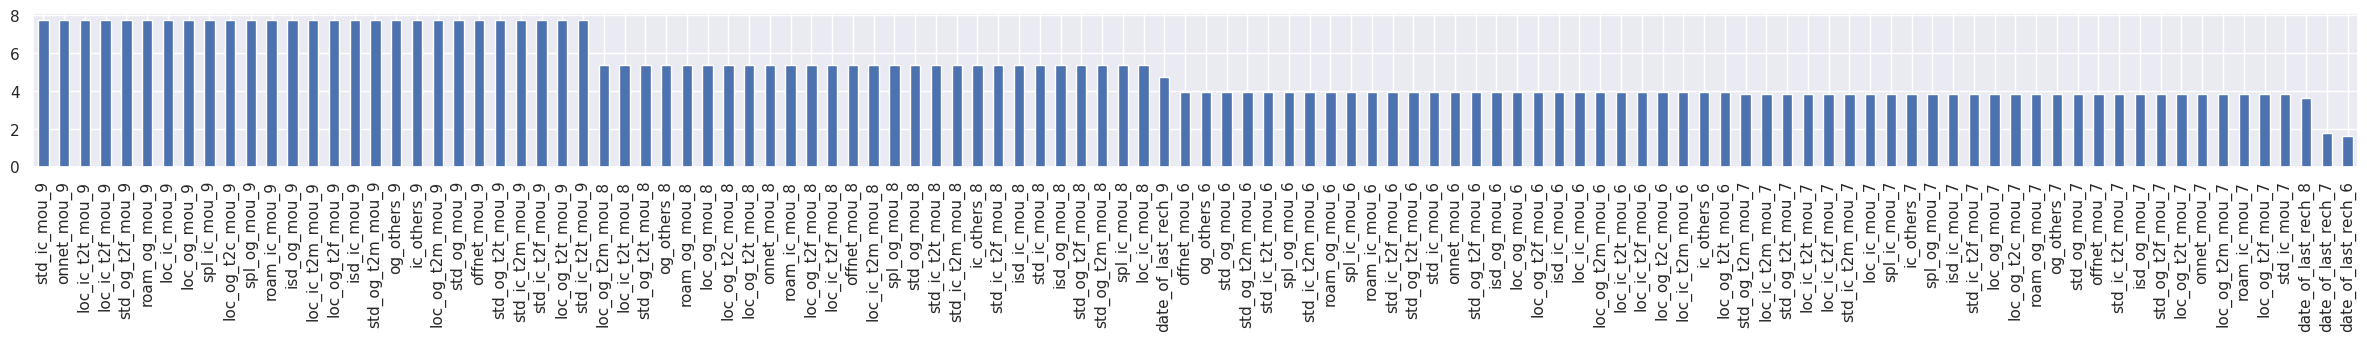

In [51]:
_,cols_with_le10_na = check_col_null_pct(telecom_df, 10)
plt.figure(figsize=(30,2))
cols_with_le10_na[(cols_with_le10_na > 0)].plot.bar()
plt.show();

##### <div style="color: #1B5AF4; font-size: 20px;"> 8. Convert Date column to day in numbers format.

In [52]:
telecom_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']] = telecom_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].apply(lambda x: pd.to_datetime(x).dt.day)

##### <div style="color: #1B5AF4; font-size: 20px;"> 9. Check for any outliers in the data set. 

In [53]:
find_outliers(telecom_df).sort_values(by=['outliers_cnt'], ascending=False).head(20)

col lower_threshold iqr_q1     iqr  iqr_q3 upper_threshold  \
0         vol_2g_mb_8           0.000  0.000   0.000   0.000           0.000   
0         vol_2g_mb_7           0.000  0.000   0.000   0.000           0.000   
0         vol_2g_mb_6           0.000  0.000   0.000   0.000           0.000   
0         vol_2g_mb_9           0.000  0.000   0.000   0.000           0.000   
0  last_day_rch_amt_9         -75.000  0.000  50.000  50.000         125.000   
0          aug_vbc_3g           0.000  0.000   0.000   0.000           0.000   
0          jul_vbc_3g           0.000  0.000   0.000   0.000           0.000   
0         vol_3g_mb_8           0.000  0.000   0.000   0.000           0.000   
0         vol_3g_mb_7           0.000  0.000   0.000   0.000           0.000   
0         vol_3g_mb_9           0.000  0.000   0.000   0.000           0.000   
0          jun_vbc_3g           0.000  0.000   0.000   0.000           0.000   
0         vol_3g_mb_6           0.000  0.000   0.000   0.000           0.000   
0         sachet_2g_9           0.000  0.000   0.000   0.000           0.000   
0         sachet_2g_8           0.000  0.000   0.000   0.000           0.000   
0         sachet_2g_7           0.000  0.000   0.000   0.000           0.000   
0         sachet_2g_6           0.000  0.000   0.000   0.000           0.000   
0      total_og_mou_7        -460.330 43.010 335.560 378.570         881.910   
0      total_og_mou_8        -458.400 38.580 331.320 369.900         866.880   
0      total_og_mou_9        -466.445 25.510 327.970 353.480         845.435   
0      total_og_mou_6        -447.440 44.740 328.120 372.860         865.040   

  outliers_cnt  
0        22785  
0        22525  
0        22268  
0        21720  
0        17714  
0        16686  
0        16097  
0        15899  
0        15421  
0        15361  
0        15129  
0        14582  
0        14178  
0        14067  
0        13305  
0        12903  
0         8624  
0         8596  
0         8534  
0         8443

<div style="color: #019900; "> Observation 6: <li>There are outliers in the dataset. But due to high class imbalance, We therefore decide not to cap new outliers as it may have impact on our Model metrics.</li></div>  

##### <div style="color: #1B5AF4; font-size: 20px;"> 10. Impute Missing Values: <li>Since there are lot of missing values in the dataset, we therefore decide to impute it. </br> <li>Also most of the columns are skewed, hence we use "median" as a strategy to impute it. </li>

In [54]:
telecom_df_bk = telecom_df.copy()
# telecom_df = telecom_df_bk

to_impute_df = telecom_df.select_dtypes(include = np.number)

si = SimpleImputer(strategy='median')
imputed_arr = si.fit_transform(to_impute_df)
df_imputed = pd.DataFrame(imputed_arr, columns = to_impute_df.columns)

telecom_df = telecom_df[telecom_df.columns.difference(to_impute_df.columns)]
telecom_df = pd.concat([telecom_df, df_imputed], axis=1)
telecom_df 

aon  arpu_6  arpu_7  arpu_8  arpu_9  aug_vbc_3g  \
0      968.000 197.385 214.816 213.803  21.100      30.400   
1     1006.000  34.047 355.074 268.321  86.285       0.000   
2     1103.000 167.690 189.058 210.226 290.714       0.000   
3     2491.000 221.338 251.102 508.054 389.500       0.000   
4     1526.000 261.636 309.876 238.174 163.426       0.000   
...        ...     ...     ...     ...     ...         ...   
99994 3199.000  18.471  69.161  57.530  29.950       0.000   
99995 2052.000 112.201  77.811  79.081 140.835       0.000   
99996  185.000 229.187   0.000   0.000   0.000       0.000   
99997  478.000 322.991 303.386 606.817 731.010    1445.740   
99998  751.000 687.065   0.000   0.000   0.000       0.000   

       date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
0                   21.000               16.000                8.000   
1                   29.000               31.000               28.000   
2                   17.000               24.000               14.000   
3                   28.000               31.000               31.000   
4                   26.000               28.000                9.000   
...                    ...                  ...                  ...   
99994                3.000               20.000               26.000   
99995               17.000               17.000               24.000   
99996               13.000               26.000               27.000   
99997               17.000               19.000               20.000   
99998               16.000               27.000               27.000   

       date_of_last_rech_9  ic_others_6  ic_others_7  ic_others_8  \
0                   28.000        0.000        0.000        0.000   
1                   30.000        0.000        0.000        0.000   
2                   29.000        0.930        3.140        0.000   
3                   30.000        0.000        0.000        0.000   
4                   28.000        0.480        0.000        0.000   
...                    ...          ...          ...          ...   
99994               25.000        0.000        0.000        0.000   
99995               26.000        0.000        0.000        0.000   
99996                2.000        0.000        0.000        0.000   
99997               17.000        0.000        0.000        0.000   
99998               28.000        2.300        0.000        0.000   

       ic_others_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  \
0            0.000         0.000         0.000         0.000         0.000   
1            0.000         1.830         0.000         0.000         0.000   
2            0.360         0.000         0.850         0.000         0.010   
3            0.800         0.000         0.000         0.000         0.000   
4            0.000         0.000         0.000         0.000         0.000   
...            ...           ...           ...           ...           ...   
99994        0.000         0.000         0.000         0.000         0.000   
99995        0.000         0.000         0.000         0.000         0.000   
99996        0.000         0.000         0.000         0.000         0.000   
99997        0.000         0.000         0.000         0.000         0.000   
99998        0.000       382.480         0.000         0.000         0.000   

       isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  jul_vbc_3g  \
0             0.000         0.000         0.000         0.000       0.000   
1             0.000         0.000         0.000         0.000       0.000   
2             0.000         0.000         0.000         0.000       0.000   
3             0.000         0.000         0.000         0.000       0.000   
4             0.000         0.000         0.000         0.000       0.000   
...             ...           ...           ...           ...         ...   
99994         0.000         0.000         0.000         0.000       0.000   
99995         0.000

##### <div style="color: #1B5AF4; font-size: 20px;"> 11. Filter the high value customers who have recharged more than 70% of the average recharge value during the good phase. 

In [55]:
# telecom_df['total_rech_amt_good_phase'] = telecom_df[['total_rech_amt_6','total_rech_amt_7']].sum(axis=1)
# telecom_df = telecom_df.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1)
# telecom_df = telecom_df[(telecom_df['total_rech_amt_good_phase'] >= telecom_df['total_rech_amt_good_phase'].quantile(0.7))]

In [56]:
telecom_df['total_rech_amt_good_phase']  = telecom_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
telecom_df = telecom_df.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1)
telecom_df = telecom_df[(telecom_df['total_rech_amt_good_phase'] >= telecom_df['total_rech_amt_good_phase'].quantile(0.7))]

<div style="color: #019900; "> Observation 6:
After filtering the high value customers, we could notice the dataset is now reduced to ~30k rows </div>

##### <div style="color: #1B5AF4; font-size: 20px;"> 12. Tag the churned customers (1 or 0) by applying conditions on the following fourth month columns: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [57]:
telecom_df['churn'] = telecom_df.apply(lambda x: 1 if ((x['total_ic_mou_9'] < 1) & (x['total_og_mou_9'] < 1) & (x['vol_2g_mb_9'] < 1 ) & (x['vol_3g_mb_9'] < 1) )  else  0, axis=1)

##### <div style="color: #1B5AF4; font-size: 20px;"> 13. Rename columns_8 as action phase based on business requirements.  

In [58]:
telecom_df.columns = telecom_df.columns.str.replace(pat='_8',repl='_action_phase')
telecom_df = telecom_df.rename(columns={'aug_vbc_3g': 'vbc_3g_action_phase'})
telecom_df.filter(like='_8').columns
telecom_df.shape

Index([], dtype='object')

(30011, 170)

##### <div style="color: #1B5AF4; font-size: 20px;"> 14. Find all columns related to churn phase or cols with _9 in name. and drop it

In [59]:
sep_cols_to_drop = telecom_df.filter(like='_9').columns.to_list()
sep_cols_to_drop.append('sep_vbc_3g')
sep_cols_to_drop

['arpu_9',
 'date_of_last_rech_9',
 'ic_others_9',
 'isd_ic_mou_9',
 'isd_og_mou_9',
 'last_day_rch_amt_9',
 'loc_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2t_mou_9',
 'max_rech_amt_9',
 'monthly_2g_9',
 'monthly_3g_9',
 'offnet_mou_9',
 'og_others_9',
 'onnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'sachet_2g_9',
 'sachet_3g_9',
 'spl_ic_mou_9',
 'spl_og_mou_9',
 'std_ic_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2t_mou_9',
 'std_og_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2t_mou_9',
 'total_ic_mou_9',
 'total_og_mou_9',
 'total_rech_amt_9',
 'total_rech_num_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'sep_vbc_3g']

In [60]:
telecom_df = telecom_df.drop(sep_cols_to_drop, axis=1)
telecom_df.shape

(30011, 128)

<div style="color: #019900; "> Observation 7:
After dropping the churn phase columns. We could now notice that the number of columns have been reduced to 131. </div>

##### <div style="color: #1B5AF4; font-size: 20px;"> 15. Filter features that are identified by months _6 & _7, in order to combine those features as "good phase" and also check the datatypes 

In [61]:
cols_to_combine =  telecom_df.filter(regex='.*(jun_|jul_|_6|_7).*',axis=1).columns
telecom_df[cols_to_combine].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 82 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arpu_6               30011 non-null  float64
 1   arpu_7               30011 non-null  float64
 2   date_of_last_rech_6  30011 non-null  float64
 3   date_of_last_rech_7  30011 non-null  float64
 4   ic_others_6          30011 non-null  float64
 5   ic_others_7          30011 non-null  float64
 6   isd_ic_mou_6         30011 non-null  float64
 7   isd_ic_mou_7         30011 non-null  float64
 8   isd_og_mou_6         30011 non-null  float64
 9   isd_og_mou_7         30011 non-null  float64
 10  jul_vbc_3g           30011 non-null  float64
 11  jun_vbc_3g           30011 non-null  float64
 12  last_day_rch_amt_6   30011 non-null  float64
 13  last_day_rch_amt_7   30011 non-null  float64
 14  loc_ic_mou_6         30011 non-null  float64
 15  loc_ic_mou_7         30011 non-null  floa

##### <div style="color: #1B5AF4; font-size: 20px;"> 16. Now that we have identified the features for "Good phase", using an aggr method we can go ahead combine those features. </br><li>once features are combined as "Good Phase", we drop all those redundant features of months _6&_7. 

In [62]:
drop_lst, new_cols = combine_features(df=telecom_df, cols=cols_to_combine, pat1='_6', pat2='_7',to_append='_good_phase')
telecom_df = telecom_df.drop(drop_lst, axis=1)
telecom_df.shape
telecom_df.columns

(30011, 87)

Index(['aon', 'arpu_action_phase', 'vbc_3g_action_phase',
       'date_of_last_rech_action_phase', 'ic_others_action_phase',
       'isd_ic_mou_action_phase', 'isd_og_mou_action_phase',
       'last_day_rch_amt_action_phase', 'loc_ic_mou_action_phase',
       'loc_ic_t2f_mou_action_phase', 'loc_ic_t2m_mou_action_phase',
       'loc_ic_t2t_mou_action_phase', 'loc_og_mou_action_phase',
       'loc_og_t2c_mou_action_phase', 'loc_og_t2f_mou_action_phase',
       'loc_og_t2m_mou_action_phase', 'loc_og_t2t_mou_action_phase',
       'max_rech_amt_action_phase', 'mobile_number', 'monthly_2g_action_phase',
       'monthly_3g_action_phase', 'offnet_mou_action_phase',
       'og_others_action_phase', 'onnet_mou_action_phase',
       'roam_ic_mou_action_phase', 'roam_og_mou_action_phase',
       'sachet_2g_action_phase', 'sachet_3g_action_phase',
       'spl_ic_mou_action_phase', 'spl_og_mou_action_phase',
       'std_ic_mou_action_phase', 'std_ic_t2f_mou_action_phase',
       'std_ic_t2m_mou_acti

In [63]:
cols_with_null,_ = check_col_null_pct(telecom_df)
cols_with_null

Series([], dtype: float64)

<div style="color: #019900; "> Observation 8:
The total no of columns are now reduced to 91 and all the null values are imputed</div>

In [64]:
telecom_df = telecom_df.drop('mobile_number', axis=1)

### Exploratory Data Analysis

#### Univariate analysis 

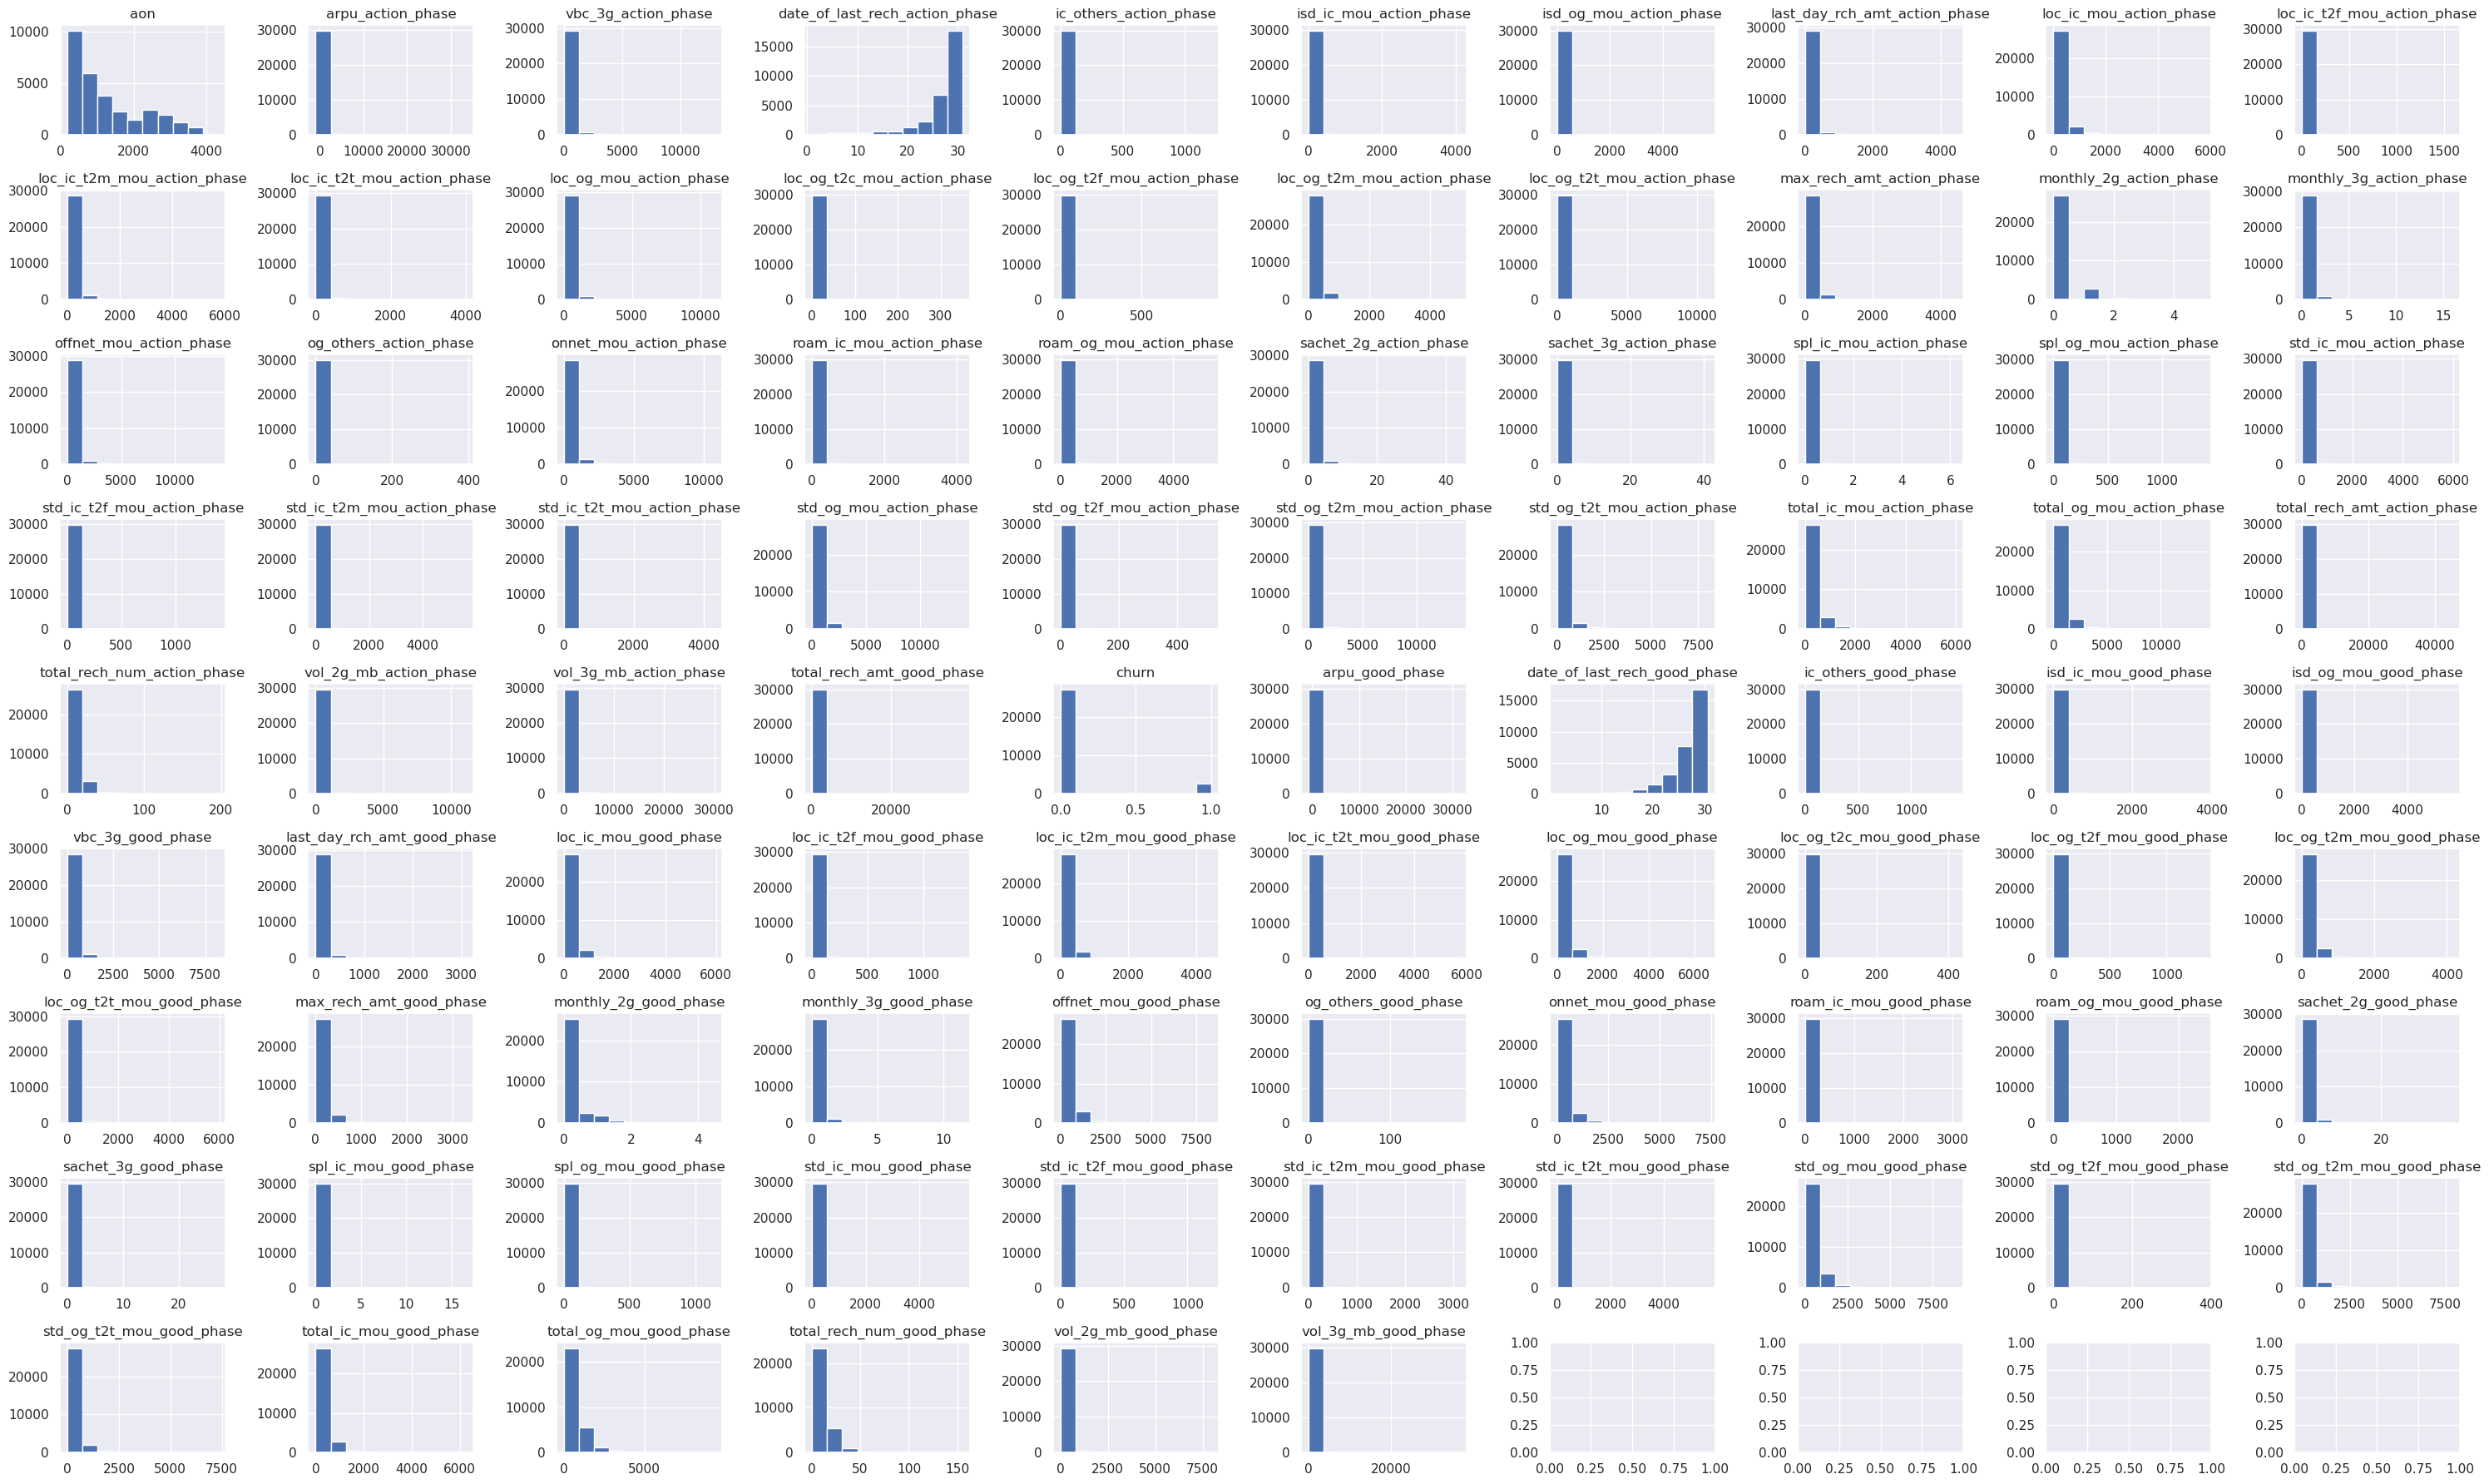

In [65]:
# Histplot analysis for all the numeric columns
cols = telecom_df.select_dtypes(include=np.number).columns
fig, axs = plt.subplots(int(np.ceil(len(cols)/10)),10, figsize=(30, int(np.ceil(len(cols)/10))*2))

for idx, col in enumerate(cols):
    t1 = axs.flatten()[idx]
    t1.hist(telecom_df[col])
    t1.set_title(col)

plt.tight_layout()
plt.show();

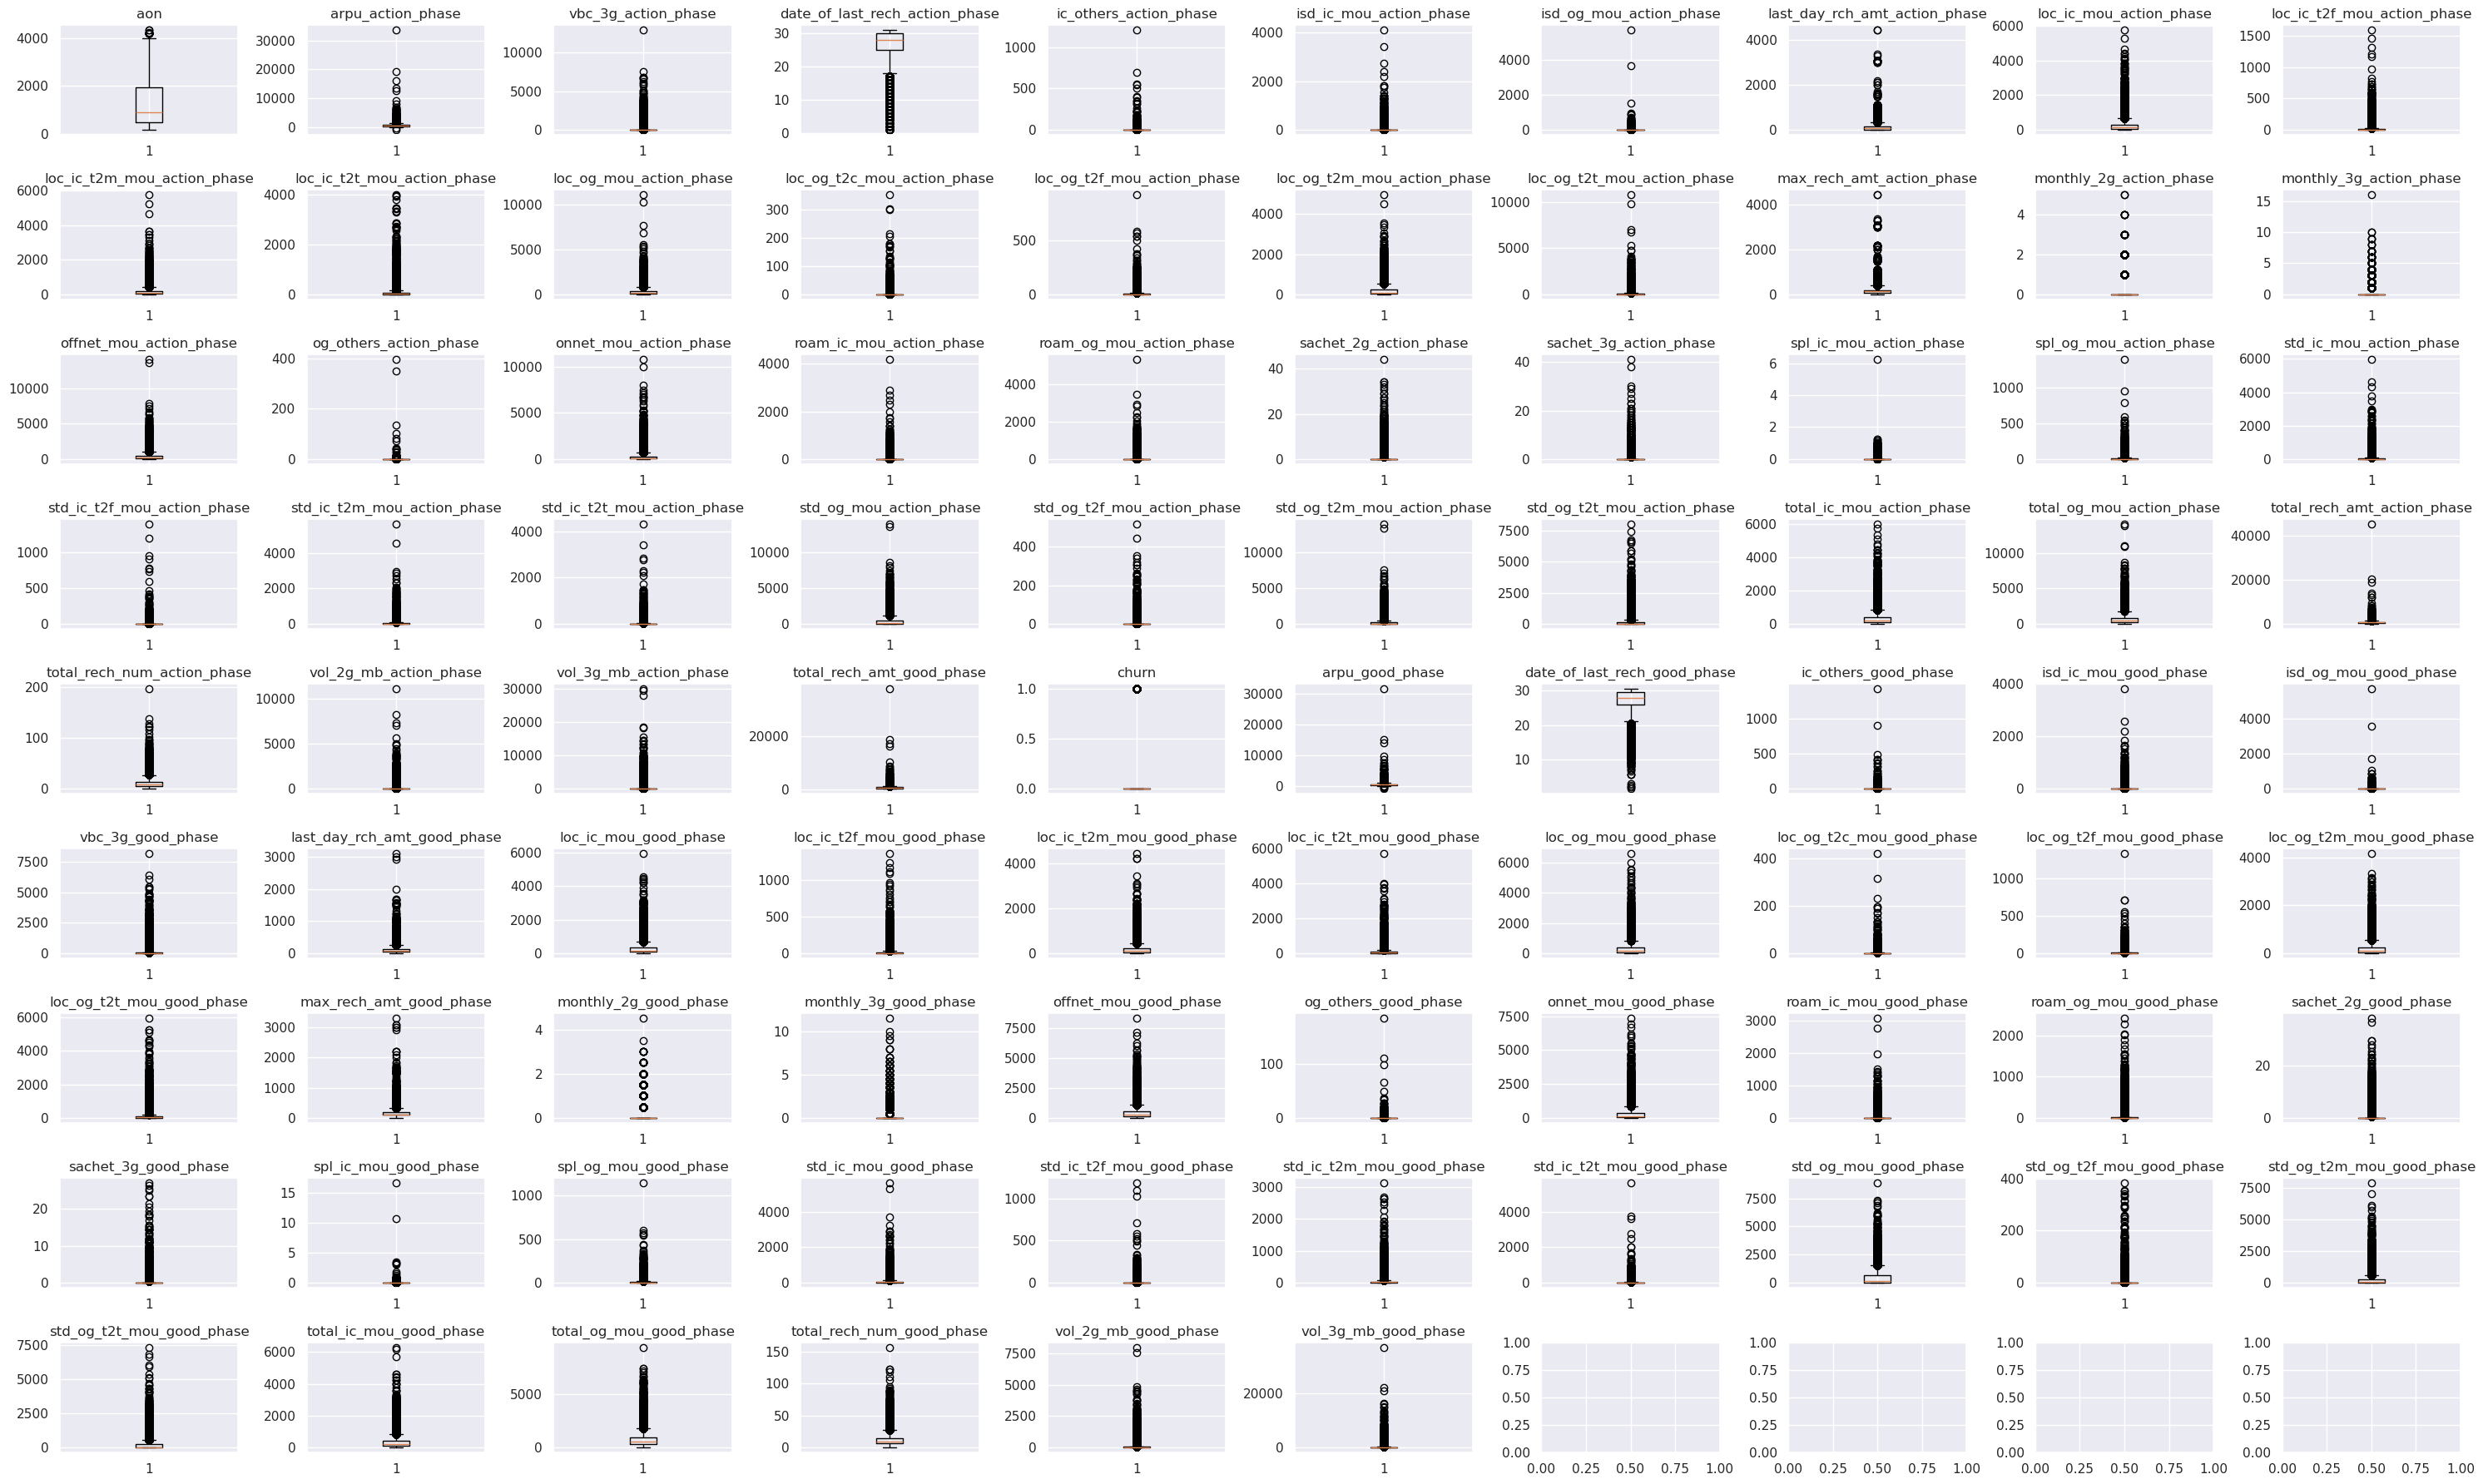

In [66]:
# Boxplot analysis for all the numeric columns
cols = telecom_df.select_dtypes(include=np.number).columns
fig, axs = plt.subplots(int(np.ceil(len(cols)/10)),10, figsize=(30, int(np.ceil(len(cols)/10))*2))

for idx, col in enumerate(cols):
    t1 = axs.flatten()[idx]
    t1.boxplot(telecom_df[col])
    t1.set_title(col)

plt.tight_layout()
plt.show();

<Axes: ylabel='aon'>

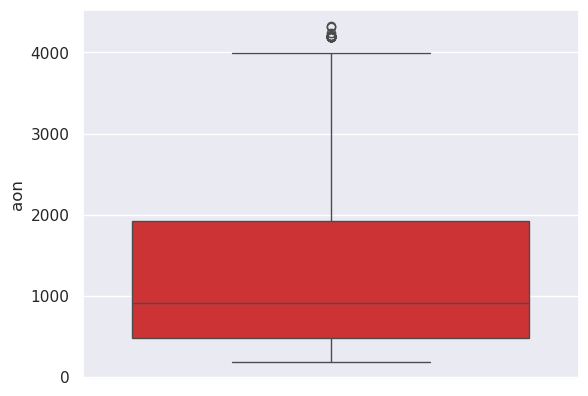

In [67]:
sns.boxplot(telecom_df['aon'],orient='vert',palette='Set1')

In [68]:
per = telecom_df['aon'].quantile([0.05,0.95]).values

# Remove Outlier
#telecom_df['aon'][telecom_df['aon'] <= per[0]] = per[0]
telecom_df['aon'][telecom_df['aon'] >= per[1]] = per[1]

#### Bivariate Analysis

In [69]:
# # Bivariate analysis
# for column in telecom_df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.displot(telecom_df, x=column, kind="hist", kde=True)
#     plt.title(f'Displot for for {column}')
# plt.show();

##### <div style=" font-size: 25px; color: green">Observations:</div><div style=" font-size: 20px;"><li>AON : New users are high in number</li><li>ARPU : Avergae revenue is sigma curve and around 700 is mid</li><li>for date_of _last_rech_action_phase, date_of_last_rech_good_phase: Number of recharges are higher towards end of the month</li><li>for isd_ic_mou, isd_og_mou: ISD calls are less in number, For many users the call duration is nearly 0</li><li>last_day_rch_amt : Mostly people recharge for 100rs on last day</li><li>loc_ic_mou_action_phase : Avg local call durations is 100mins for majority of the people</li><li>max_rech_amt_action_phase : Majority of the customers recharge for 100-150 rs during action phase</li><li>monthly_2g_action_phase : 2g usage for majority of the customers is very low</li><li>monthly_3g_action_phase : 3g usage for majority of the customers is very low</li><li>Local calls within operator are high in numbers, than calls to other operators</li><li>Roaming usage is also low</li></div>

##### <div style="color: #1B5AF4; font-size: 20px;"> 16. Now that we have identified the features for "Good phase", using an aggr method we can go ahead combine those features. </br><li>once features are combined as "Good Phase", we drop all those redundant features of months _6&_7. 

In [70]:
# Bivariate analysis
# for column in telecom_df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.displot(telecom_df, x=column, hue='churn', kind="hist", kde=True)
#     plt.title(f'Displot for {column}')
#     plt.show()

##### <div style=" font-size: 25px; color: green">Observations:</div><div style=" font-size: 20px;"><li>Churn rate decreases significantly over the age of customers</li><li>Chrun rate is very less for customers having arpu more than 1000</li><li>Churn rate is more for users doing recharge in 22-28 date</li><li>last_day_rch_amt_action_phase : Churn rate is higher smong customers who do recharge for lesser amount</li><li>Churn rate is higher among customers whose consumption of services like incoming calls, outgoing calls are low</li><li>max_rech_amt_action_phase : For lower recharge amount churn rate is higher</li><li>total_rech_amt_action_phase : For lower recharge amount churn rate is higher</li><li>date_of_last_rech_good_phase : Churn rate pattern is different than action phase</li><li>last_day_rch_amt_good_phase : Pattern is similar to that of action phase</li>

####  Multivariate analysis 

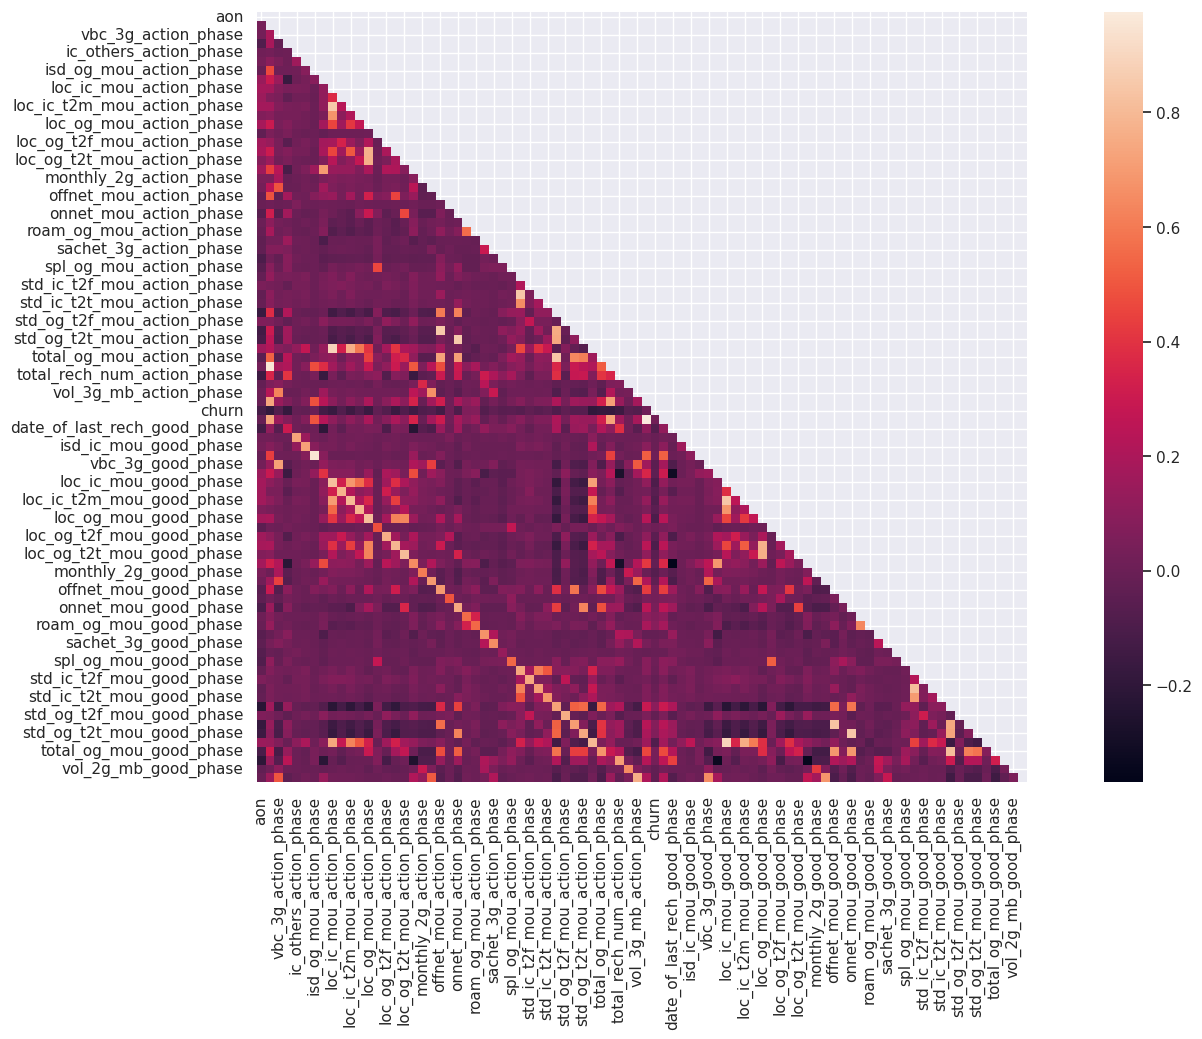

In [71]:
corr_df = telecom_df[telecom_df.select_dtypes(include=np.number).columns].corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
fig, axs = plt.subplots(figsize=(20,10))
with sns.axes_style('white'):
    axs = sns.heatmap(corr_df, mask=mask, square=True)
plt.plot();

In [72]:
corr_df = telecom_df.corr(numeric_only=True).abs()
corr_df = corr_df.unstack()
correlation = corr_df.sort_values()
correlation = corr_df.dropna()

correlation = correlation [correlation  != 1.0]
correlation = correlation .reset_index()
correlation.sort_values(by=0, ascending=False).head(20)

level_0                      level_1     0
3868              arpu_good_phase    total_rech_amt_good_phase 0.974
3699    total_rech_amt_good_phase              arpu_good_phase 0.974
3316  total_rech_amt_action_phase            arpu_action_phase 0.954
123             arpu_action_phase  total_rech_amt_action_phase 0.954
558       isd_og_mou_action_phase        isd_og_mou_good_phase 0.949
4171        isd_og_mou_good_phase      isd_og_mou_action_phase 0.949
6937      total_ic_mou_good_phase        loc_ic_mou_good_phase 0.892
4500        loc_ic_mou_good_phase      total_ic_mou_good_phase 0.892
3153    total_ic_mou_action_phase      loc_ic_mou_action_phase 0.887
716       loc_ic_mou_action_phase    total_ic_mou_action_phase 0.887
1905       onnet_mou_action_phase  std_og_t2t_mou_action_phase 0.857
3082  std_og_t2t_mou_action_phase       onnet_mou_action_phase 0.857
858   loc_ic_t2m_mou_action_phase      loc_ic_mou_action_phase 0.852
689       loc_ic_mou_action_phase  loc_ic_t2m_mou_action_phase 0.852
1734      offnet_mou_action_phase  std_og_t2m_mou_action_phase 0.850
2995  std_og_t2m_mou_action_phase      offnet_mou_action_phase 0.850
5689         onnet_mou_good_phase    std_og_t2t_mou_good_phase 0.847
6866    std_og_t2t_mou_good_phase         onnet_mou_good_phase 0.847
4473        loc_ic_mou_good_phase    loc_ic_t2m_mou_good_phase 0.846
4642    loc_ic_t2m_mou_good_phase        loc_ic_mou_good_phase 0.846

##### <div style=" font-size: 25px; color: green">Top 5 Highly correlated features are: 
|Column A|column B|
|-----------------------------|-------------------------------------|
| arpu_good_phase	          |  total_rech_amt_good_phase	| 0.974 |
| arpu_action_phase           |	 total_rech_amt_action_phase| 0.954 |
| isd_og_mou_action_phase	  |  isd_og_mou_good_phase	    | 0.949 |
| total_ic_mou_good_phase	  |  loc_ic_mou_good_phase	    | 0.892 |
| total_ic_mou_action_phase	  |  loc_ic_mou_action_phase	| 0.887 |



In [73]:
# evaluate the stats for all numeric columns
telecom_df.describe()

aon  arpu_action_phase  vbc_3g_action_phase  \
count 30011.000          30011.000            30011.000   
mean   1248.437            534.857              129.440   
std     940.230            492.260              390.479   
min     180.000           -945.808                0.000   
25%     480.000            289.610                0.000   
50%     914.000            452.091                0.000   
75%    1924.000            671.150                1.600   
max    3179.000          33543.624            12916.220   

       date_of_last_rech_action_phase  ic_others_action_phase  \
count                       30011.000               30011.000   
mean                           26.911                   1.238   
std                             5.038                  12.890   
min                             1.000                   0.000   
25%                            25.000                   0.000   
50%                            28.000                   0.000   
75%                            30.000                   0.060   
max                            31.000                1209.860   

       isd_ic_mou_action_phase  isd_og_mou_action_phase  \
count                30011.000                30011.000   
mean                    11.701                    2.029   
std                     74.929                   44.795   
min                      0.000                    0.000   
25%                      0.000                    0.000   
50%                      0.000                    0.000   
75%                      0.000                    0.000   
max                   4100.380                 5681.540   

       last_day_rch_amt_action_phase  loc_ic_mou_action_phase  \
count                      30011.000                30011.000   
mean                          95.653                  237.214   
std                          145.260                  305.235   
min                            0.000                    0.000   
25%                            0.000                   60.030   
50%                           50.000                  142.840   
75%                          130.000                  302.110   
max                         4449.000                 5748.810   

       loc_ic_t2f_mou_action_phase  loc_ic_t2m_mou_action_phase  \
count                    30011.000                    30011.000   
mean                        14.736                      155.449   
std                         43.705                      215.972   
min                          0.000                        0.000   
25%                          0.000                       35.890   
50%                          1.850                       89.810   
75%                         11.605                      196.975   
max                       1588.530                     5738.460   

       loc_ic_t2t_mou_action_phase  loc_og_mou_action_phase  \
count                    30011.000                30011.000   
mean                        66.438                  263.226   
std                        155.515                  365.285   
min                          0.000                    0.000   
25%                          8.570                   48.005   
50%                         26.840                  148.280   
75%                         70.330                  348.310   
max                       4003.210                11039.910   

       loc_og_t2c_mou_action_phase  loc_og_t2f_mou_action_phase  \
count                    30011.000                    30011.000   
mean                         1.713                        6.494   
std                          7.398                       20.220   
min                          0.000                        0.000   
25%                          0.000                        0.000   
50%                          0.000                        0.160   
75%                          0.050                        4.680   
max                        351.830                      928.490   



In [74]:
# telecom_df.to_csv('test.csv')

### Train and Test Split

In [75]:
X = telecom_df.drop('churn', axis=1)
y = telecom_df['churn']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

### Scaling

In [77]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train, y_train)
X_train

X_test[X_test.columns] = scaler.transform(X_test)

aon  arpu_action_phase  vbc_3g_action_phase  \
39561 -0.436              0.145               -0.325   
70763 -0.647              0.260               -0.074   
63600 -0.939              0.244               -0.325   
5725  -0.460             -1.121               -0.325   
67497 -0.444              2.176               -0.325   
...      ...                ...                  ...   
87046 -0.326             -0.817               -0.325   
94396 -0.629             -0.529               -0.325   
85870 -0.270             -1.140               -0.325   
99887 -0.819             -0.859               -0.325   
65818 -1.036             -0.846               -0.325   

       date_of_last_rech_action_phase  ic_others_action_phase  \
39561                           0.807                  -0.074   
70763                          -1.959                  -0.092   
63600                          -0.181                   0.129   
5725                           -3.935                  -0.092   
67497                           0.807                  -0.092   
...                               ...                     ...   
87046                          -0.379                  -0.092   
94396                          -0.181                  -0.092   
85870                           0.609                  -0.092   
99887                          -0.181                  -0.092   
65818                           0.807                  -0.092   

       isd_ic_mou_action_phase  isd_og_mou_action_phase  \
39561                   -0.159                   -0.044   
70763                    1.523                   -0.027   
63600                   -0.159                   -0.044   
5725                    -0.159                   -0.044   
67497                   -0.159                   -0.044   
...                        ...                      ...   
87046                   -0.159                   -0.044   
94396                   -0.159                   -0.044   
85870                   -0.159                   -0.044   
99887                   -0.159                   -0.044   
65818                   -0.159                   -0.044   

       last_day_rch_amt_action_phase  loc_ic_mou_action_phase  \
39561                         -0.321                   -0.282   
70763                          3.223                    4.986   
63600                          0.246                   -0.715   
5725                          -0.513                   -0.786   
67497                          0.246                    3.287   
...                              ...                      ...   
87046                         -0.676                   -0.702   
94396                          0.402                   -0.416   
85870                         -0.676                   -0.786   
99887                         -0.676                   -0.692   
65818                         -0.463                   -0.784   

       loc_ic_t2f_mou_action_phase  loc_ic_t2m_mou_action_phase  \
39561                       -0.333                       -0.049   
70763                        5.083                        6.201   
63600                       -0.333                       -0.648   
5725                        -0.333                       -0.734   
67497                       21.541                        0.383   
...                            ...                          ...   
87046                       -0.299                       -0.696   
94396                       -0.279                       -0.502   
85870                       -0.333                       -0.734   
99887                       -0.256                       -0.663   
65818                       -0.333                       -0.731   

       loc_ic_t2t_mou_action_phase  loc_og_mou_action_phase  \
39561                       -0.387                   -0.573   
70763                       -0.214                   -0.059   
63600                       -0.412                   -0.684   
5725    

### Class Imbalance

In [78]:
# telecom_df.to_csv('test.csv')
telecom_df['churn'].sum()/len(telecom_df['churn'])*100

8.823431408483556

There is an imbalance in the data set. With only 8% representing the class label 1 (minority class) . 

In [79]:
X_train_ori, y_train_ori = X_train.copy(), y_train.copy()

#### Custom Function for Class Imbalance

In [80]:
# Below a common function to call all the Imbalance techniques. 
def handle_imbalance(X_tr, y_tr, technique='oversampling', random_state=100):
    if technique == 'undersampling':
        under_sample = RandomUnderSampler(random_state=random_state, sampling_strategy='majority')
        # print(under_sample.get_params())
        # print(under_sample._sampling_strategy_docstring)
        X_train_udr, y_train_udr = under_sample.fit_resample(X_tr, y_tr)
        return X_train_udr, y_train_udr
    elif technique == 'tomek_links':
        tomek_sample = TomekLinks()
        # print(tomek_sample.get_params())
        # print(tomek_sample._sampling_strategy_docstring)
        X_train_tomek, y_train_tomek = tomek_sample.fit_resample(X_tr, y_tr)
        return X_train_tomek, y_train_tomek
    elif technique == 'oversampling':
        over_sample = RandomOverSampler(random_state=random_state)
        # print(over_sample.get_params())
        # print(over_sample._sampling_strategy_docstring)
        X_train_ovr, y_train_ovr = over_sample.fit_resample(X_tr, y_tr)
        return X_train_ovr, y_train_ovr
    elif technique == 'smote':
        smote_sample = SMOTE(random_state=random_state, k_neighbors=5)
        # print(smote_sample.get_params())
        # print(smote_sample._sampling_strategy_docstring)
        X_train_smote, y_train_smote = smote_sample.fit_resample(X_tr, y_tr)
        return X_train_smote, y_train_smote
    elif technique == 'adasyn':
        adasyn_sample = ADASYN(random_state=random_state, n_neighbors=5)
        # print(adasyn_sample.get_params())
        # print(adasyn_sample._sampling_strategy_docstring)
        X_train_adasyn, y_train_adasyn = adasyn_sample.fit_resample(X_tr, y_tr)
        return X_train_adasyn, y_train_adasyn
    elif technique == 'smote_tomek':
        smote_tomek_sample = SMOTETomek(random_state=random_state)
        # print(smote_tomek_sample.get_params())
        X_train_smote_tomek, y_train_smote_tomek = smote_tomek_sample.fit_resample(X_tr, y_tr)
        return X_train_smote_tomek, y_train_smote_tomek

####  Class Imbalance using Oversampling

In [81]:
X_train_ovr, y_train_ovr = handle_imbalance(X_train_ori, y_train_ori, technique='oversampling', random_state=100)
sum(y_train_ovr)/len(y_train_ovr)*100
sorted(Counter(y_train_ovr).items())

50.0

[(0, 19153), (1, 19153)]

####  Class Imbalance using SMOTE

In [82]:
X_train_smote, y_train_smote = handle_imbalance(X_train_ori, y_train_ori, technique='smote', random_state=100)
sum(y_train_smote)/len(y_train_smote)*100
sorted(Counter(y_train_smote).items())

50.0

[(0, 19153), (1, 19153)]

####  Class Imbalance using ADASYN

In [83]:
X_train_adasyn, y_train_adasyn = handle_imbalance(X_train_ori, y_train_ori, technique='adasyn', random_state=100)
sum(y_train_adasyn)/len(y_train_adasyn)*100
sorted(Counter(y_train_adasyn).items())

49.94773428108504

[(0, 19153), (1, 19113)]

### ----------------------------------

### Principal Component Analysis

In [84]:
def principal_component_analysis(X_tr, random_state=100):
    pca = PCA(random_state=random_state)
    pca.fit(X_tr)

    var_ratio_df = pd.DataFrame({'feature':X_tr.columns, 'var_ratio': pca.explained_variance_ratio_})
    components = pd.DataFrame(pca.components_)
    var_ratio_df = pd.concat([var_ratio_df,components],axis=1)
    var_ratio_df.head()
    
    fig, axs = plt.subplots(1,3, figsize=(25,5))
    axs[0].bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
    axs[0].set_xlabel('Component number')
    axs[0].set_ylabel('Explained variance ratio')
    axs[0].set_title('Bar plot')

    axs[1].plot(pca.explained_variance_ratio_)
    axs[1].set_xlabel('Component number')
    axs[1].set_ylabel('Explained variance ratio')
    axs[1].set_title('Scree plot')

    var_cumu = np.cumsum(pca.explained_variance_ratio_) 
    axs[2].vlines(x=47, ymax=1, ymin=0, colors="r", linestyles="--")
    axs[2].hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
    axs[2].plot(var_cumu)
    axs[2].set_ylabel("Cumulative variance explained")
    axs[2].set_xlabel('Component number')
    plt.show();
    
def incremental_pca(X_tr, X_te, n_components=45):
    pca_incremental = IncrementalPCA(n_components, )
    pca_incremental.fit(X_tr)
    
    principal_components = pca_incremental.components_
    feature_names = X_tr.columns

    # Calculate the overall importance of each feature
    feature_importance = {}
    for i, component in enumerate(principal_components):
        for j, weight in enumerate(component):
            if feature_names[j] not in feature_importance:
                feature_importance[feature_names[j]] = 0.0
            feature_importance[feature_names[j]] += abs(weight)

    # Sort features by their overall importance
    sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    feature_lst = []
    for feature, importance in sorted_feature_importance[:10]:
        feature_lst.append(f"{feature}: {importance}")

    df_tr_pca = pca_incremental.fit_transform(X_tr)
    df_te_pca = pca_incremental.transform(X_te)
    
    return df_tr_pca, df_te_pca, feature_names, feature_lst

#### <div style="font-size: 22px;">Apply PCA (Dimensionality Reduction) on dataset generated by multiple class imbalance techniques</div>

PCA using Random Oversampling


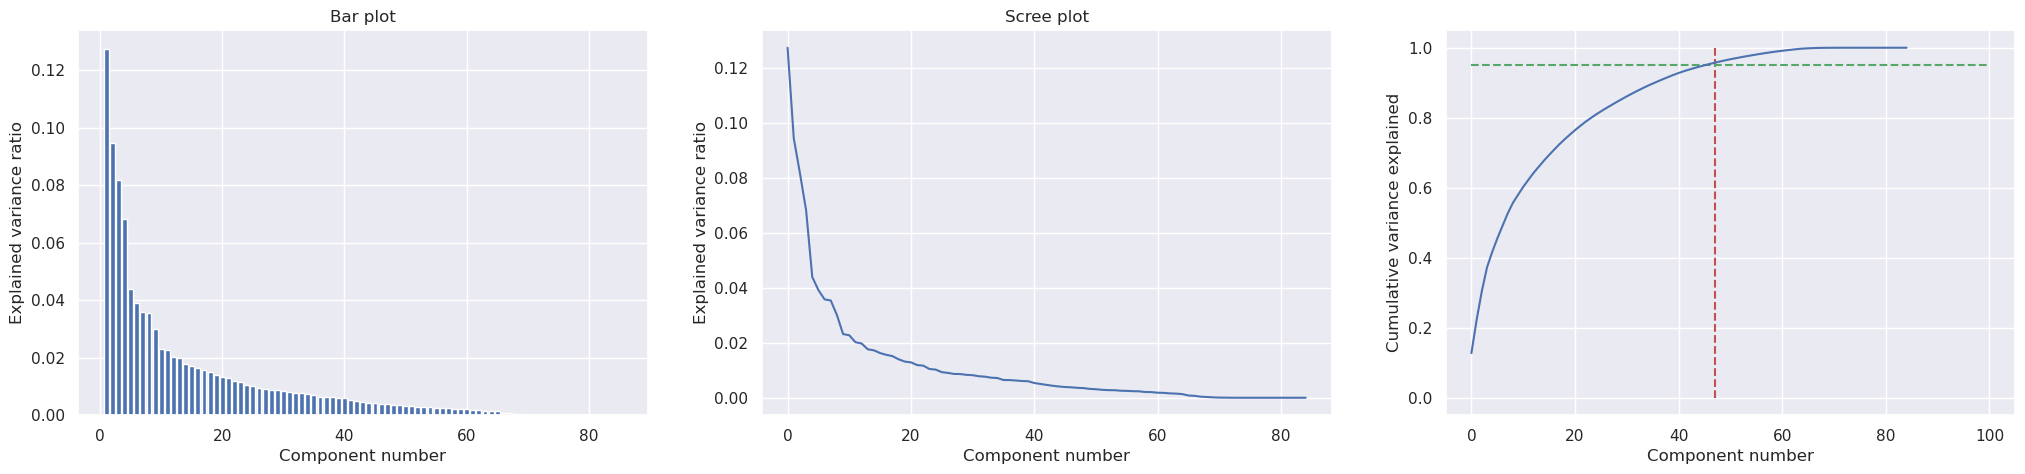

PCA using SMOTE


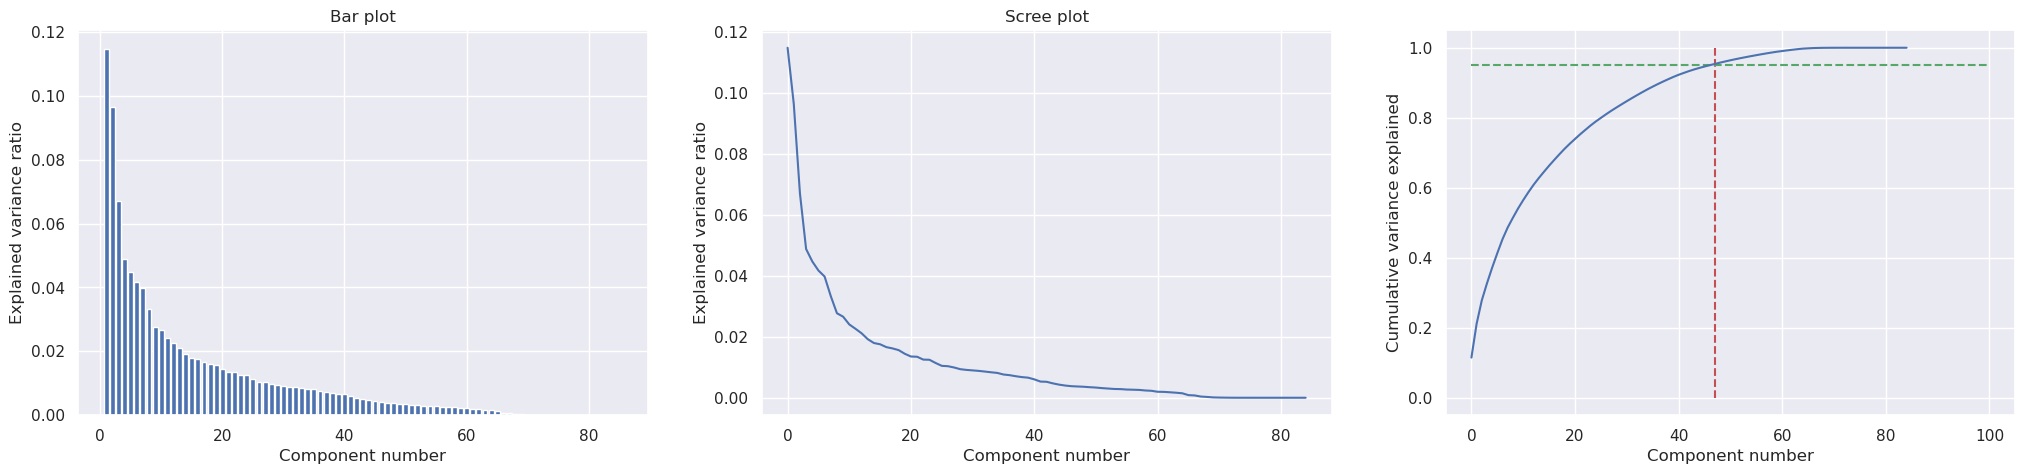

PCA using ADASYN


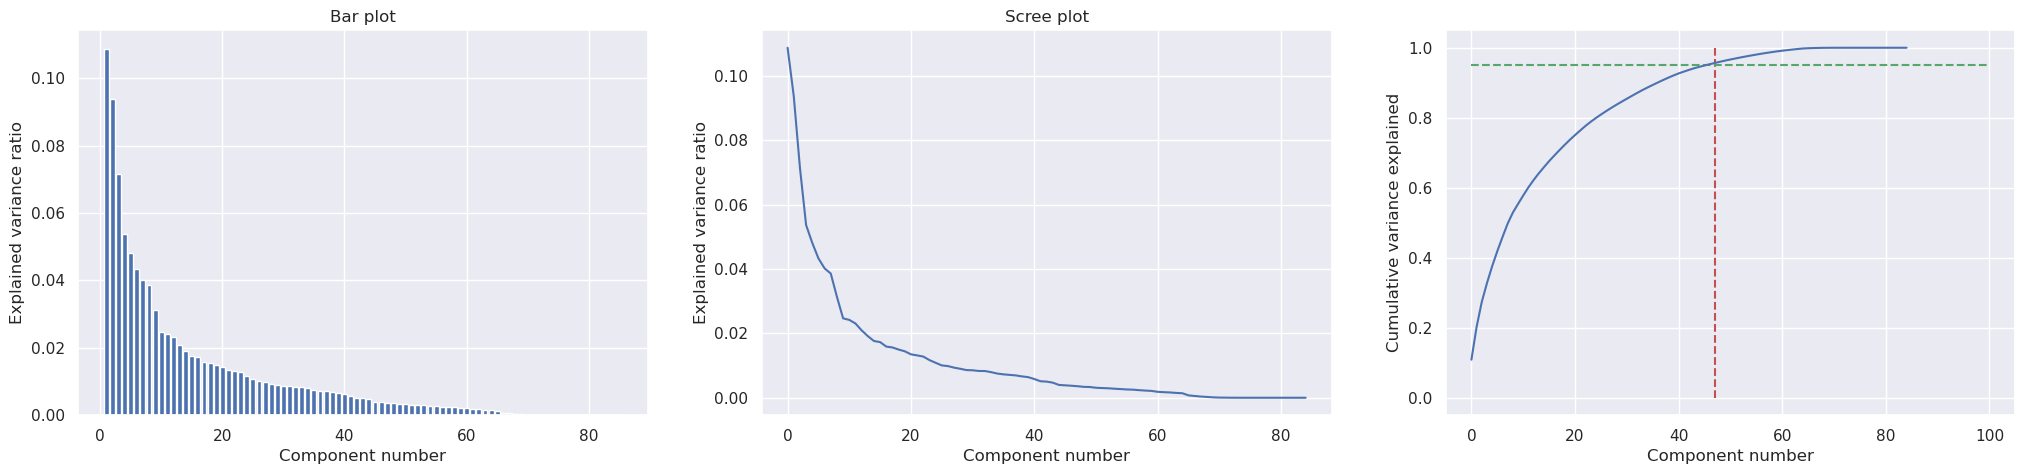

In [85]:
print("PCA using Random Oversampling")
X_train , y_train = X_train_ovr, y_train_ovr 
principal_component_analysis(X_train, random_state=100)
df_train_ovr_pca, df_test_ovr_pca, feature_names, feature_lst = incremental_pca(X_train, X_test, n_components=45)

print("PCA using SMOTE")
X_train , y_train = X_train_smote, y_train_smote 
principal_component_analysis(X_train, random_state=100)
df_train_smote_pca, df_test_smote_pca, feature_names, feature_lst = incremental_pca(X_train, X_test, n_components=45)

print("PCA using ADASYN")
X_train , y_train = X_train_adasyn, y_train_adasyn 
principal_component_analysis(X_train, random_state=100)
df_train_adasyn_pca, df_test_adasyn_pca, feature_names, feature_lst = incremental_pca(X_train, X_test, n_components=45)

We applied PCA(dimensionality reduction) over various classing balance techniques and found out that, there is not much difference in the final outcome (reduction).

### ----------------------------------

### Machine Learning - Algorithms and Models 

####  Custom Functions for Model Building

In [86]:
# Function to train using logistic regression Model
def model_training(fXt, fyt, fcutoff, ftest=False, fres=None):
    fXt_sm = sm.add_constant(fXt)
    
    if ftest == False:
        lrm = sm.GLM(fyt, fXt_sm, family=sm.families.Binomial())
        lrm = lrm.fit()
        fyt_pred = lrm.predict(fXt_sm)
    else:
        lrm = fres
        fyt_pred = lrm.predict(fXt_sm)
        
    fyt_pred = fyt_pred.values.reshape(-1)
    fyt_pred_final = pd.DataFrame({'Converted': fyt.values, 'Conv_Prob': fyt_pred})
    fyt_pred_final['ID'] = fyt.index
    fyt_pred_final['predicted'] = fyt_pred_final.Conv_Prob.map(lambda x: 1 if x > fcutoff else 0)
    return lrm, fyt_pred, fyt_pred_final

# Metrics for logistic regression 
def logreg_metrics_fn(fyt_pred_final):
    fconfusion = confusion_matrix(fyt_pred_final.Converted, fyt_pred_final.predicted )
    faccuracy = accuracy_score(fyt_pred_final.Converted, fyt_pred_final.predicted)
    
    TP = fconfusion[1,1] # true positive 
    TN = fconfusion[0,0] # true negatives
    FP = fconfusion[0,1] # false positives
    FN = fconfusion[1,0] # false negatives
    
    fSensi  = TP/(TP+FN) # Calculate the sensitivity
    fSpeci  = TN/(TN+FP) # Calculate the specificity
    fPreci  = TP/(TP+FP) # Calculate Precision
    fRecal  = TP/(TP+FN) # Calculate Recall
       
    return fconfusion, faccuracy, fSensi, fSpeci, fPreci, fRecal

# Function to generate VIF of scores. 
def get_vif_score(fXt, cl):
    vif = pd.DataFrame()
    vif['Features'] = fXt[cl].columns
    vif['VIF'] = [variance_inflation_factor(fXt[cl].values, i) for i in range(fXt[cl].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# A common function to generate most imp metrics for all the classification algorithms. 
def generate_metrics(yt, yt_pred, yt_prob ):
    accuracy = accuracy_score(yt, yt_pred,  )
    f1_sc = f1_score(yt, yt_pred,  )
    recall = recall_score(yt, yt_pred,  )
    precision = precision_score(yt, yt_pred,  )
    roc_score = roc_auc_score(yt, yt_prob)
    cl_rep = classification_report(yt, yt_pred)
    conf_mat = confusion_matrix(yt, yt_pred)
    df = pd.DataFrame({"accuracy":[accuracy],"roc_score":[roc_score],"precision":[precision],"recall":[recall],"f1_score":[f1_sc], 
                       "classification_report":[cl_rep], "confusion_matrix": [conf_mat]})
    return df, accuracy,roc_score, precision,recall, f1_sc, cl_rep, conf_mat

# Function to generate final summary report comprising of all the models and its metrics scores
def generate_summary_report(df=None, model_name="", class_imb='', train_accuracy="", test_accuracy="", roc_score="", precision="", recall="", f1_score="", classification_rep="", conf_matrix="", feature_imp="", step='create'):
    if step == 'create':
        df = pd.DataFrame(columns=["model_name","class_imb","train_accuracy","test_accuracy","roc_score","precision","recall","f1_score", "classification_report", "confusion_matrix", "feature_imp"])
        return df
    elif step == 'add': 
        df.loc[len(df)] = pd.Series({"model_name": model_name,"class_imb":class_imb,"train_accuracy": train_accuracy, "test_accuracy": test_accuracy,"roc_score": roc_score,"precision": precision,"recall": recall,"f1_score":f1_score, "classification_report": classification_rep, "confusion_matrix": conf_matrix, "feature_imp":feature_imp})
        return df

#### Logistic Regression - RFE

##### Model Building

In [87]:
X_train, y_train = X_train_ovr, y_train_ovr

logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

In [88]:
# Find the optimum no of top features and Its contribution to the overall score using the RFECV method. 
rfecv = RFECV(estimator=logreg, cv=5)
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression())

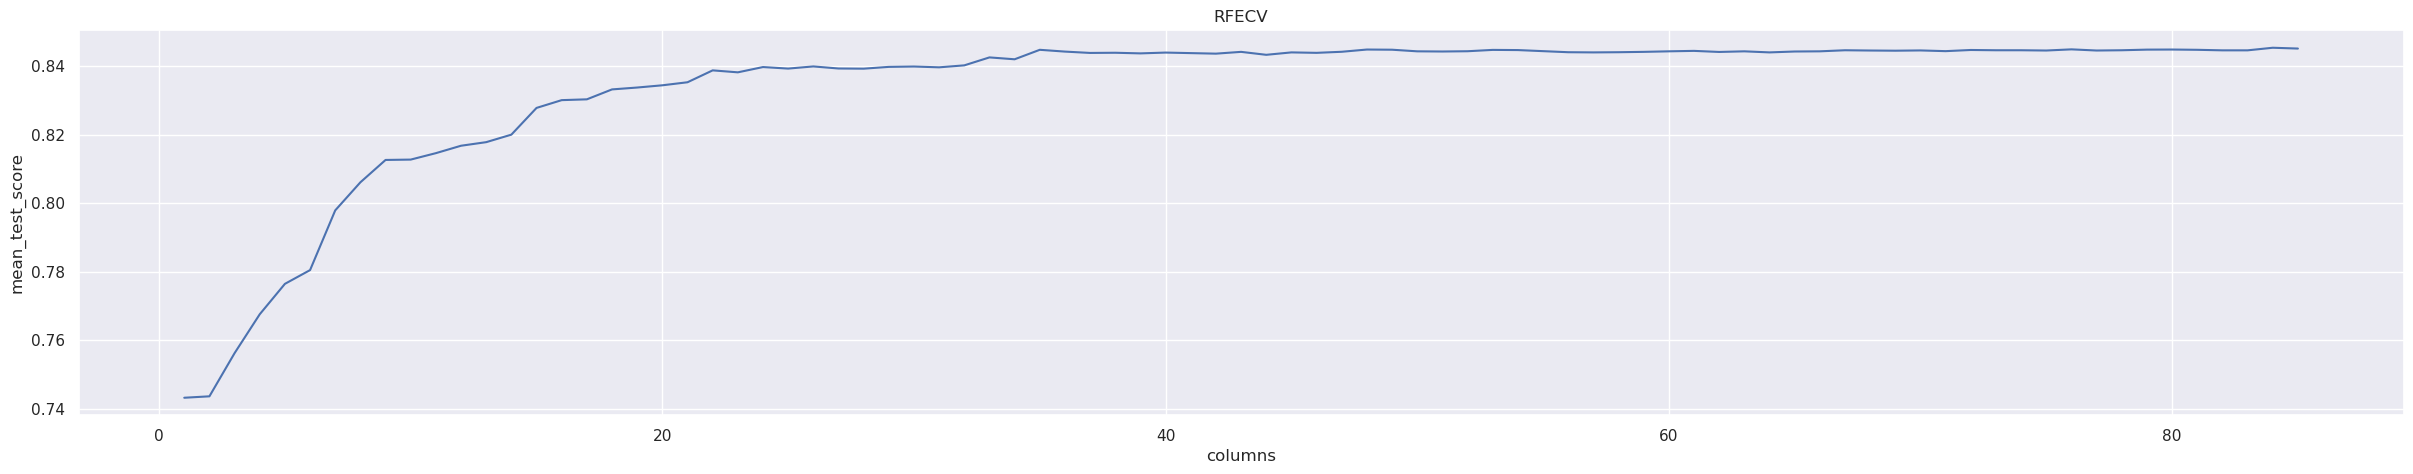

In [89]:
rfecv.cv_results_['mean_test_score']
plt.figure(figsize=[30, 5])
plt.plot(range(1, len(X_train.columns)+1), rfecv.cv_results_['mean_test_score'])
plt.title('RFECV')
plt.ylabel('mean_test_score')
plt.xlabel('columns')
plt.show();

From the chart we can observe that, the optimum no of features that contribute to overall score is 15 - 20 after with the graph Flattens out.

In [90]:
rfe = RFE(estimator=logreg, n_features_to_select= 15) 
rfe = rfe.fit(X_train, y_train)

cols = rfe.get_feature_names_out()
rfe_df = pd.DataFrame({'feature':X_train.columns, 'rank': rfe.ranking_ , 'support': rfe.support_})
rfe_df.sort_values(by='rank', ascending=True).head(15)

feature  rank  support
47      isd_ic_mou_good_phase     1     True
63      offnet_mou_good_phase     1     True
37  total_ic_mou_action_phase     1     True
12    loc_og_mou_action_phase     1     True
72      std_ic_mou_good_phase     1     True
38  total_og_mou_action_phase     1     True
27    spl_ic_mou_action_phase     1     True
65       onnet_mou_good_phase     1     True
8     loc_ic_mou_action_phase     1     True
80    total_ic_mou_good_phase     1     True
5     isd_ic_mou_action_phase     1     True
19    monthly_3g_action_phase     1     True
81    total_og_mou_good_phase     1     True
51      loc_ic_mou_good_phase     1     True
29    std_ic_mou_action_phase     1     True

In [91]:
logreg = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logreg = logreg.fit()
# logreg.summary()

##### Logreg Model 1

In [92]:
logreg1, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg1.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train, cols)
vif_scores[vif_scores['VIF'] > 5].head()

total_ic_mou_good_phase   0.000
std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
loc_ic_mou_good_phase     0.000
total_og_mou_good_phase   0.000
dtype: float64

Features     VIF
13    total_ic_mou_good_phase 442.120
9       loc_ic_mou_good_phase 327.360
6   total_ic_mou_action_phase  97.370
12      std_ic_mou_good_phase  70.810
1     loc_ic_mou_action_phase  68.930

##### Logreg Model 2

In [93]:
# 'total_ic_mou_good_phase' feature has very high VIF score. Hence we drop it. 
cols = list(cols)
cols.remove('total_ic_mou_good_phase')

logreg2, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg2.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5].head()

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
total_og_mou_good_phase   0.000
loc_ic_mou_good_phase     0.000
spl_ic_mou_action_phase   0.000
dtype: float64

Features    VIF
6   total_ic_mou_action_phase 81.080
1     loc_ic_mou_action_phase 58.200
13    total_og_mou_good_phase 26.800
10      offnet_mou_good_phase 14.800
11       onnet_mou_good_phase 14.070

##### Logreg Model 3

In [94]:
# 'total_ic_mou_action_phase' feature has very high VIF score. Hence we drop it. 
cols.remove('total_ic_mou_action_phase')

logreg3, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg3.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5].head()

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
std_ic_mou_action_phase   0.000
loc_ic_mou_good_phase     0.000
dtype: float64

Features    VIF
12  total_og_mou_good_phase 26.790
9     offnet_mou_good_phase 14.770
10     onnet_mou_good_phase 14.050

##### Logreg Model 4

In [95]:
# 'total_og_mou_good_phase' feature has very high VIF score. Hence we drop it. 
cols.remove('total_og_mou_good_phase')

logreg4, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg4.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5].head()

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
std_ic_mou_action_phase   0.000
loc_ic_mou_good_phase     0.000
dtype: float64

Empty DataFrame
Columns: [Features, VIF]
Index: []

##### Logreg Model 5

In [96]:
# Final Model after performing pvalues and VIF analysis
logreg5, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg5.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores.head()

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
std_ic_mou_action_phase   0.000
loc_ic_mou_good_phase     0.000
dtype: float64

Features   VIF
1     loc_ic_mou_action_phase 2.840
8       loc_ic_mou_good_phase 2.260
6   total_og_mou_action_phase 1.970
5     std_ic_mou_action_phase 1.950
11      std_ic_mou_good_phase 1.870

In [97]:
# Important features contributing to the model. 
feature_imp = (logreg5.params.sort_values(ascending=False, key=abs)).reset_index()
feature_imp = feature_imp.rename(columns={'index':'columns', 0:'imp_score'})
feature_imp

columns  imp_score
0   total_og_mou_action_phase     -1.225
1                       const     -1.202
2     loc_ic_mou_action_phase     -1.126
3     loc_og_mou_action_phase     -0.910
4        onnet_mou_good_phase      0.608
5     spl_ic_mou_action_phase     -0.602
6       offnet_mou_good_phase      0.566
7     monthly_3g_action_phase     -0.501
8     std_ic_mou_action_phase     -0.420
9     isd_ic_mou_action_phase     -0.395
10      loc_ic_mou_good_phase      0.338
11      isd_ic_mou_good_phase      0.245
12      std_ic_mou_good_phase      0.142

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(2)

# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'preci', 'recall'])
for i in numbers:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci, preci, recall]
    
cutoff_df

Converted   Conv_Prob   ID   predicted  0.000  0.100  0.200  0.300  0.400  \
0           0       0.146    0           0      1      1      0      0      0   
1           0       0.060    1           0      1      0      0      0      0   

   0.500  0.600  0.700  0.800  0.900  
0      0      0      0      0      0  
1      0      0      0      0      0

prob  accuracy  sensi  speci  preci  recall
0.000 0.000     0.500  1.000  0.000  0.500   1.000
0.100 0.100     0.618  0.973  0.263  0.569   0.973
0.200 0.200     0.677  0.950  0.405  0.615   0.950
0.300 0.300     0.725  0.916  0.534  0.663   0.916
0.400 0.400     0.771  0.884  0.658  0.721   0.884
0.500 0.500     0.808  0.843  0.773  0.788   0.843
0.600 0.600     0.807  0.750  0.865  0.847   0.750
0.700 0.700     0.756  0.590  0.923  0.885   0.590
0.800 0.800     0.669  0.378  0.961  0.907   0.378
0.900 0.900     0.565  0.142  0.988  0.920   0.142

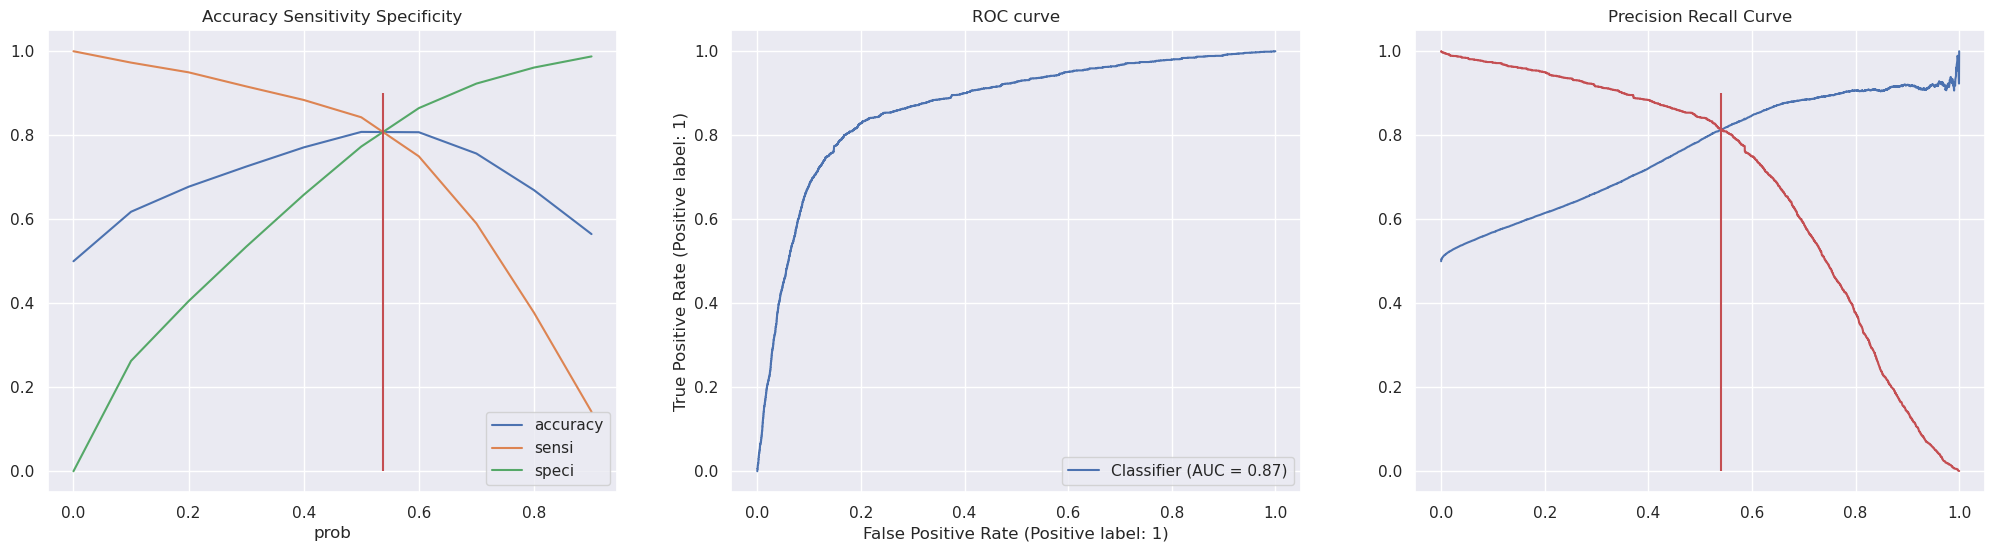

In [99]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], ax=axs[0])
axs[0].set_title('Accuracy Sensitivity Specificity')
axs[0].vlines( ymin=0, ymax=0.9,x=0.537, color="r")

# Plot ROC curve and check the area under curve 
RocCurveDisplay.from_predictions(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate=False, ax=axs[1 ])
axs[1].set_title('ROC curve')

# plot Precision and Recall curve and find the optimal cutoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)
axs[2].plot(thresholds, p[:-1], "b")
axs[2].plot(thresholds, r[:-1], "r")
axs[2].set_title('Precision Recall Curve')
axs[2].vlines( ymin=0, ymax=0.9,x=0.54, color="r")
plt.show();

In [100]:
# the cutoff value from accuracy sensitivity and specificity curve is 0.537
# Apply the cutoff value to see the prediction on train dataset.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.537 else 0)
y_train_pred_final.head()

# Let's check the overall Metrics.
cf_matrix, train_accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Train Accuracy - {round(train_accuracy,3)}\nSensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

Converted   Conv_Prob   ID   predicted  0.000  0.100  0.200  0.300  0.400  \
0           0       0.146    0           0      1      1      0      0      0   
1           0       0.060    1           0      1      0      0      0      0   
2           0       0.542    2           1      1      1      1      1      1   
3           0       0.986    3           1      1      1      1      1      1   
4           0       0.003    4           0      1      0      0      0      0   

   0.500  0.600  0.700  0.800  0.900   final_predicted  
0      0      0      0      0      0                 0  
1      0      0      0      0      0                 0  
2      1      0      0      0      0                 1  
3      1      1      1      1      1                 1  
4      0      0      0      0      0                 0

Train Accuracy - 0.808
Sensitivity - 0.843
specificity - 0.773
Precision - 0.788
Recall - 0.843


In [101]:
# the cutoff value from Precision - Recall curve is 0.537
# Apply the cutoff value to see the prediction on train dataset.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_train_pred_final.head()

# Let's check the overall metrics. 
cf_matrix, train_accuracy,sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Train Accuracy - {round(train_accuracy,3)}\nSensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

Converted   Conv_Prob   ID   predicted  0.000  0.100  0.200  0.300  0.400  \
0           0       0.146    0           0      1      1      0      0      0   
1           0       0.060    1           0      1      0      0      0      0   
2           0       0.542    2           1      1      1      1      1      1   
3           0       0.986    3           1      1      1      1      1      1   
4           0       0.003    4           0      1      0      0      0      0   

   0.500  0.600  0.700  0.800  0.900   final_predicted  
0      0      0      0      0      0                 0  
1      0      0      0      0      0                 0  
2      1      0      0      0      0                 1  
3      1      1      1      1      1                 1  
4      0      0      0      0      0                 0

Train Accuracy - 0.808
Sensitivity - 0.843
specificity - 0.773
Precision - 0.788
Recall - 0.843


##### Model Testing

In [102]:
# Apply the trained Model on the test set
logregp, y_test_pred, y_test_pred_final = model_training(X_test[cols], y_test, 0.54, True, logreg5)

# check the overall metrics for test set
cf_matrix, test_accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_test_pred_final)
roc_score = roc_auc_score( y_test_pred_final.Converted, y_test_pred_final.Conv_Prob )
f1_sc = f1_score(y_test, y_test_pred_final.predicted)
class_report = classification_report(y_test, y_test_pred_final.predicted)

print(f'Test Accuracy - {round(test_accuracy,3)}\nROC Score - {round(roc_score,3)}\nSensitivity - {round(sensitivity,3)}\nSpecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

overall_summary_df = generate_summary_report()
overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="LogisticRegression",class_imb='oversampling', train_accuracy=train_accuracy, test_accuracy=test_accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc, classification_rep=class_report, conf_matrix=cf_matrix, feature_imp=feature_imp, step='add')

Test Accuracy - 0.819
ROC Score - 0.872
Sensitivity - 0.821
Specificity - 0.819
Precision - 0.305
Recall - 0.821


#### Logistic Regression - PCA

In [103]:
# LogisticRegression after PCA and Oversampling
# Check the overall metrics after performing LogisticRegressionCV
def logistic_regression(df_train_pca, df_test_pca, y_train, y_test, overall_summary_df):
    lr_pca = LogisticRegressionCV(cv=10, random_state=100)
    lr_pca.fit(df_train_pca, y_train)
    
    lr_pca_feature_importances = lr_pca.coef_.reshape(-1)
    lr_pca_feature_imp_df = pd.DataFrame({'principal_component': range(len(lr_pca_feature_importances)), 'imp_score': lr_pca_feature_importances})
    
    lr_pca_ytrain_prob = lr_pca.predict_proba(df_train_pca)[:,1]
    lr_pca_ytrain_pred = lr_pca.predict(df_train_pca)

    lr_pca_ytest_prob = lr_pca.predict_proba(df_test_pca)[:,1]
    lr_pca_ytest_pred = lr_pca.predict(df_test_pca)

    _, train_accuracy, _, _, _, _, _, _ = generate_metrics(y_train, yt_pred=lr_pca_ytrain_pred, yt_prob=lr_pca_ytrain_prob)
    metrics_df, test_accuracy, roc_score, precision,recall, f1_sc, class_report, conf_matrix = generate_metrics(y_test, yt_pred=lr_pca_ytest_pred, yt_prob=lr_pca_ytest_prob)
    print(metrics_df)

    overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="LogisticRegressionPCA",class_imb='oversampling', train_accuracy=train_accuracy, test_accuracy=test_accuracy, roc_score=roc_score, 
                                                precision=precision, recall=recall, f1_score=f1_sc, classification_rep=class_report, conf_matrix=conf_matrix, feature_imp=lr_pca_feature_imp_df, step='add')

In [104]:
X_train, y_train = X_train_ovr, y_train_ovr 
logistic_regression(df_train_ovr_pca, df_test_ovr_pca, y_train, y_test, overall_summary_df = overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.827      0.892      0.318   0.838     0.461   

                               classification_report  \
0                precision    recall  f1-score   ...   

             confusion_matrix  
0  [[6782, 1428], [129, 665]]  


#### DecisionTreeClassifier

In [105]:
# Reusable function to perform Decision Tree classification and check the overall performance of the model
def decision_tree_classifier(X_train, y_train, X_test, y_test, technique, overall_summary_df):
    dtc = DecisionTreeClassifier(random_state=100, max_depth=6)
    dtc = dtc.fit(X_train, y_train)

    # Get feature importance
    dtc_feature_importances = dtc.feature_importances_
    if X_train.shape[1] == len(X.columns):
        model_name="DecisionTreeClassifier"
        dtc_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': dtc_feature_importances})
        plt.figure(figsize=(60,8))
        plot_tree(dtc, feature_names=list(X_train.columns), class_names=['No Churn', 'Churn'], filled=True, fontsize=6)
        plt.show();
    else:
        model_name="DecisionTreeClassifierPCA"
        dtc_feature_imp_df = pd.DataFrame({'principal_component': range(len(dtc_feature_importances)), 'imp_score': dtc_feature_importances})
    dtc_feature_imp_df.sort_values(by='imp_score', ascending=False).head(5)

    # Predict on train set 
    y_train_prob_dtc = dtc.predict_proba(X_train)[:, 1]
    y_train_pred_dtc = dtc.predict(X_train)

    # Predict on test set 
    y_test_prob_dtc = dtc.predict_proba(X_test)[:, 1]
    y_test_pred_dtc = dtc.predict(X_test)

    # Check overall performance of the model using various metrics
    _, train_accuracy, _, _, _, _, _, _ = generate_metrics(y_train, yt_pred=y_train_pred_dtc, yt_prob=y_train_prob_dtc)
    metrics_df, test_accuracy, roc_score, precision,recall, f1_sc, class_report, conf_matrix = generate_metrics(y_test, yt_pred=y_test_pred_dtc, yt_prob=y_test_prob_dtc)
    print(metrics_df)
    
    overall_summary_df = generate_summary_report(df=overall_summary_df, model_name=model_name, class_imb=technique, train_accuracy=train_accuracy, test_accuracy=test_accuracy, roc_score=roc_score, 
                                                precision=precision, recall=recall, f1_score=f1_sc, classification_rep =class_report, conf_matrix=conf_matrix, feature_imp=dtc_feature_imp_df, step='add')

##### DecisionTree - Oversampling

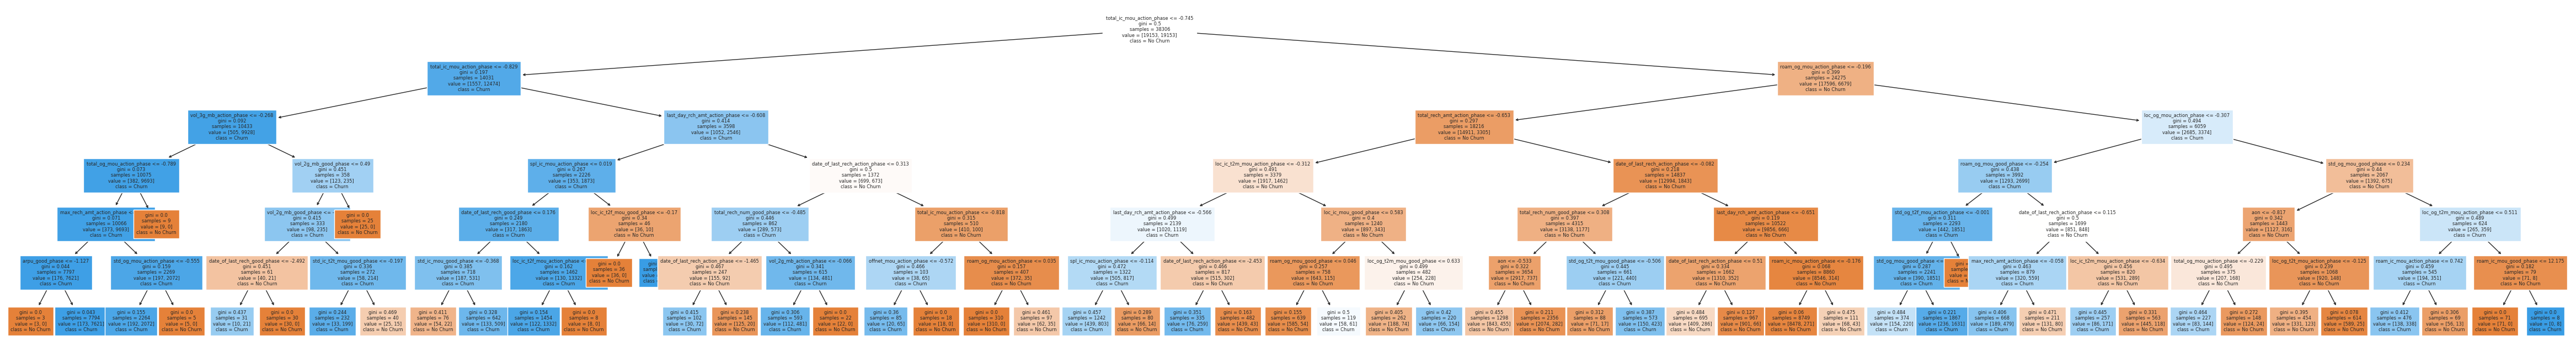

   accuracy  roc_score  precision  recall  f1_score  \
0     0.854      0.902      0.359   0.831     0.501   

                               classification_report  \
0                precision    recall  f1-score   ...   

             confusion_matrix  
0  [[7029, 1181], [134, 660]]  


In [106]:
# Decision Tree after performing oversampling.
X_train, y_train = X_train_ovr, y_train_ovr
decision_tree_classifier(X_train, y_train, X_test, y_test,  technique='oversampling', overall_summary_df=overall_summary_df)

##### Decision Tree - SMOTE

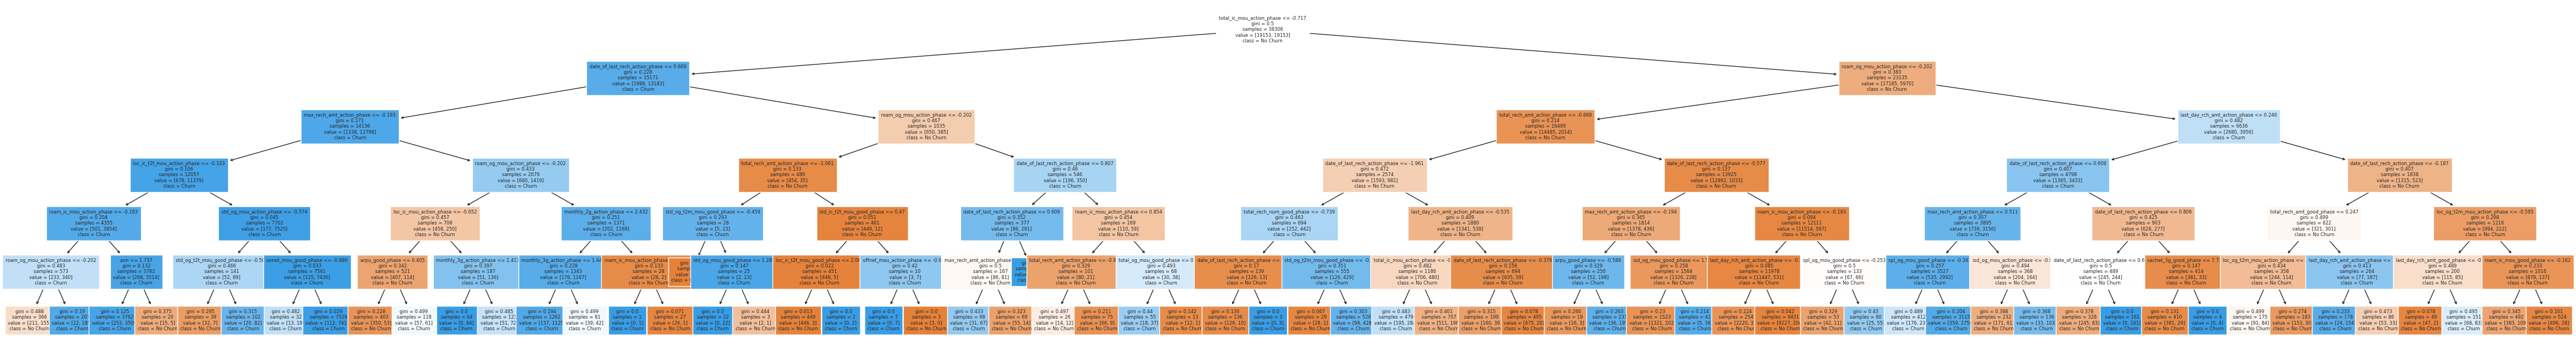

   accuracy  roc_score  precision  recall  f1_score  \
0     0.895      0.911      0.443   0.761     0.560   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7452, 758], [190, 604]]  


In [107]:
# Decision Tree after performing SMOTE. 
X_train, y_train = X_train_smote, y_train_smote
decision_tree_classifier(X_train, y_train, X_test, y_test, technique='smote', overall_summary_df=overall_summary_df)

##### DT - ADASYN

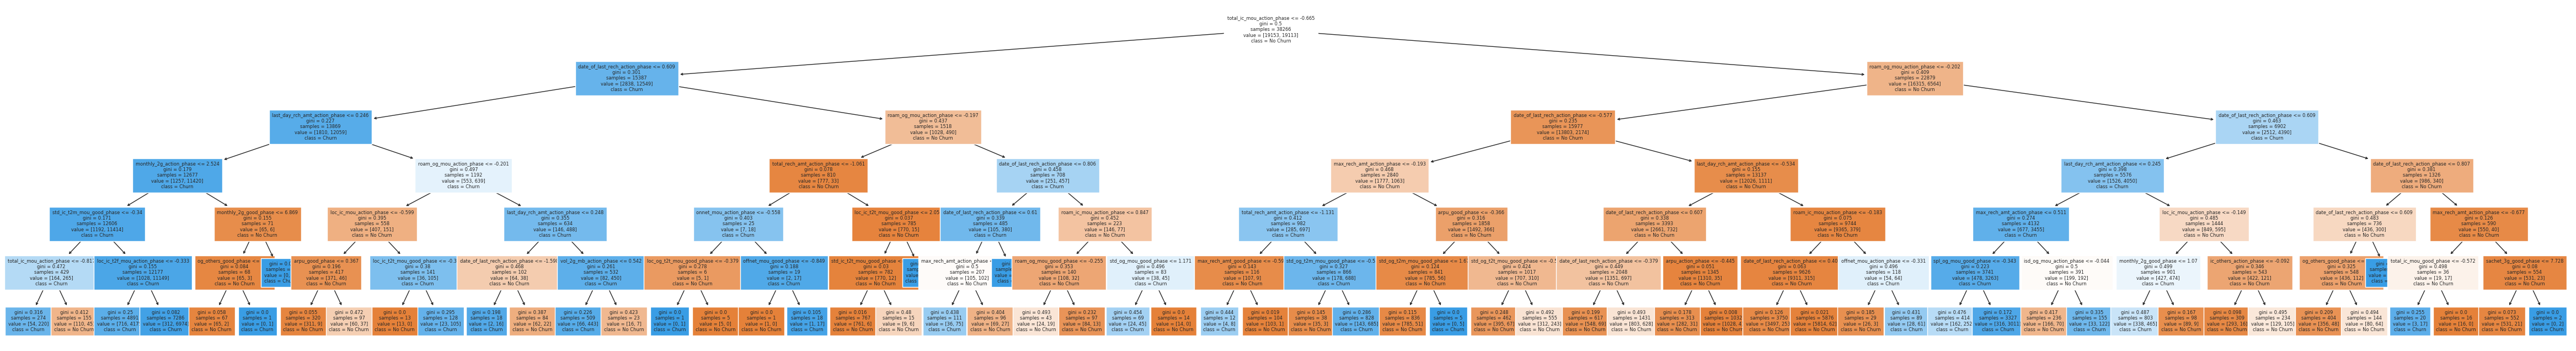

   accuracy  roc_score  precision  recall  f1_score  \
0     0.871      0.898      0.388   0.798     0.522   

                               classification_report  \
0                precision    recall  f1-score   ...   

             confusion_matrix  
0  [[7208, 1002], [160, 634]]  


In [108]:
# Decision Tree after performing ADASYN. 
X_train, y_train = X_train_adasyn, y_train_adasyn
decision_tree_classifier(X_train, y_train, X_test, y_test, technique='adasyn', overall_summary_df=overall_summary_df)

#### Decision Tree - PCA

In [109]:
# Decision Tree after performing PCA and Oversampling. 
X_train, y_train = X_train_ovr, y_train_ovr 
decision_tree_classifier(df_train_ovr_pca, y_train, df_test_ovr_pca, y_test, technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.820      0.846      0.300   0.781     0.433   

                               classification_report  \
0                precision    recall  f1-score   ...   

             confusion_matrix  
0  [[6760, 1450], [174, 620]]  


#### RandomForestClassifier

In [110]:
# Reusable function to perform RandomForestClassifier and check the overall performance of the model
def random_forest_classifier(X_train, y_train, X_test, y_test, technique, overall_summary_df):
    rf = RandomForestClassifier(random_state=100, oob_score=True, max_depth=6)
    rf.fit(X_train, y_train)

    # Get feature importance
    rf_feature_importances = rf.feature_importances_
    if X_train.shape[1] == len(X.columns):
        model_name="RandomForestClassifier"
        rf_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': rf_feature_importances})
    else:
        model_name="RandomForestClassifierPCA"
        rf_feature_imp_df = pd.DataFrame({'principal_component': range(len(rf_feature_importances)), 'imp_score': rf_feature_importances})
    rf_feature_imp_df.sort_values(by='imp_score', ascending=False).head(10)

    # Predict on Train set
    rf_ytrain_prob = rf.predict_proba(X_train)[:, 1]
    rf_ytrain_pred = rf.predict(X_train)

    # PRedict on Test set
    rf_ytest_prob = rf.predict_proba(X_test)[:, 1]
    rf_ytest_pred = rf.predict(X_test)

    # Check overall performance of the model using various metrics. 
    _, train_accuracy, _, _, _, _, _, _ = generate_metrics(y_train, yt_pred=rf_ytrain_pred, yt_prob=rf_ytrain_prob)
    metrics_df, test_accuracy, roc_score, precision,recall, f1_sc, class_report, conf_matrix = generate_metrics(y_test, yt_pred=rf_ytest_pred, yt_prob=rf_ytest_prob)
    print(metrics_df)

    overall_summary_df = generate_summary_report(df=overall_summary_df, model_name=model_name,class_imb=technique, train_accuracy=train_accuracy, test_accuracy=test_accuracy, roc_score=roc_score, 
                                                precision=precision, recall=recall, f1_score=f1_sc, classification_rep=class_report, conf_matrix=conf_matrix, feature_imp=rf_feature_imp_df, step='add')

##### Random Forest - Oversampling

In [111]:
# Perform random forest after oversampling. 
X_train, y_train = X_train_ovr, y_train_ovr
random_forest_classifier(X_train, y_train, X_test, y_test,  technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.907      0.934      0.482   0.792     0.600   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7535, 675], [165, 629]]  


##### Random Forest - SMOTE

In [112]:
# Perform random forest after. SMOTE
X_train, y_train = X_train_smote, y_train_smote
random_forest_classifier(X_train, y_train, X_test, y_test, technique='smote', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.903      0.931      0.471   0.802     0.594   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7495, 715], [157, 637]]  


##### Random Forest - ADASYN

In [113]:
# Perform random forest after. ADASYN
X_train, y_train = X_train_adasyn, y_train_adasyn
random_forest_classifier(X_train, y_train, X_test, y_test, technique='adasyn', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.888      0.932      0.429   0.817     0.563   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7347, 863], [145, 649]]  


#### Random Forest - PCA

In [114]:
# Perform random forest after PCA and Oversampling
X_train, y_train = X_train_ovr, y_train_ovr 
random_forest_classifier(df_train_ovr_pca, y_train, df_test_ovr_pca, y_test, technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.874      0.893      0.391   0.768     0.518   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7260, 950], [184, 610]]  


#### GradientBoostingClassifier

In [115]:
# Reusable function to perform GradientBoostingClassifier and check the overall performance of the model
def gradient_boosting_classifier(X_train, y_train, X_test, y_test, technique, overall_summary_df):
    gbc = GradientBoostingClassifier(random_state=100, max_depth=6)
    gbc.fit(X_train, y_train)

    # Get feature importance
    gbc_feature_importances = gbc.feature_importances_
    if X_train.shape[1] == len(X.columns):
        model_name="GradientBoostingClassifier"
        gbc_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': gbc_feature_importances})
    else:
        model_name="GradientBoostingClassifierPCA"
        gbc_feature_imp_df = pd.DataFrame({'principal_component': range(len(gbc_feature_importances)), 'imp_score': gbc_feature_importances})    
    gbc_feature_imp_df.sort_values(by='imp_score', ascending=False).head(10)

    # Predict on train set. 
    gbc_ytrain_prob = gbc.predict_proba(X_train)[:, 1]
    gbc_ytrain_pred = gbc.predict(X_train)

    # Reddit on test set. 
    gbc_ytest_prob = gbc.predict_proba(X_test)[:, 1]
    gbc_ytest_pred = gbc.predict(X_test)

    # Check overall performance of the model using various metrics. 
    _, train_accuracy, _, _, _, _, _, _ = generate_metrics(y_train, yt_pred=gbc_ytrain_pred, yt_prob=gbc_ytrain_prob)
    metrics_df, test_accuracy, roc_score, precision,recall, f1_sc, class_report, conf_matrix = generate_metrics(y_test, yt_pred=gbc_ytest_pred, yt_prob=gbc_ytest_prob)
    print(metrics_df)

    overall_summary_df = generate_summary_report(df=overall_summary_df, model_name=model_name, class_imb=technique, train_accuracy=train_accuracy, test_accuracy=test_accuracy, roc_score=roc_score, 
                                                precision=precision, recall=recall, f1_score=f1_sc, classification_rep=class_report, conf_matrix=conf_matrix, feature_imp=gbc_feature_imp_df, step='add')    

##### Gradient Boosting - Oversampling

In [116]:
# Gradient boosting after oversampling
X_train, y_train = X_train_ovr, y_train_ovr
gradient_boosting_classifier(X_train, y_train, X_test, y_test, technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.928      0.945      0.567   0.788     0.660   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7732, 478], [168, 626]]  


##### Gradient Boosting - SMOTE

In [117]:
# Gradient boosting after SMOTE
X_train, y_train = X_train_smote, y_train_smote
gradient_boosting_classifier(X_train, y_train, X_test, y_test, technique='smote', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.936      0.942      0.623   0.685     0.653   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7881, 329], [250, 544]]  


##### Gradient Boosting - ADASYN

In [118]:
# Gradient boosting after ADAsyn
X_train, y_train = X_train_adasyn, y_train_adasyn
gradient_boosting_classifier(X_train, y_train, X_test, y_test, technique='adasyn', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.934      0.940      0.614   0.689     0.649   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7866, 344], [247, 547]]  


#### Gradient Boosting - PCA

In [119]:
# Gradient boosting after PCA and oversampling
X_train, y_train = X_train_ovr, y_train_ovr 
gradient_boosting_classifier(df_train_ovr_pca, y_train, df_test_ovr_pca, y_test, technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.903      0.906      0.467   0.686     0.556   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7589, 621], [249, 545]]  


#### XGBoostClassifier

In [120]:
# Reusable function to perform XGBClassifier and check the overall performance of the model
def xgb_classifier(X_train, y_train, X_test, y_test, technique, overall_summary_df):
    xgb_cfl =  xgb.XGBClassifier(scale_pos_weight= 1, objective = 'binary:logistic', random_state= 100, max_depth=6)
    xgb_cfl.fit(X_train, y_train)

    # Get feature importance
    xgb_feature_importances = xgb_cfl.feature_importances_
    if X_train.shape[1] == len(X.columns):
        model_name="XGBClassifier"
        xgb_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': xgb_feature_importances})
    else:
        model_name="XGBClassifierPCA"
        xgb_feature_imp_df = pd.DataFrame({'principal_component': range(len(xgb_feature_importances)), 'imp_score': xgb_feature_importances}) 
    xgb_feature_imp_df.sort_values(by='imp_score', ascending=False).head(10)

    # Predict on trains set. 
    xgb_ytrain_prob = xgb_cfl.predict_proba(X_train)[:, 1]
    xgb_ytrain_pred = xgb_cfl.predict(X_train)

    # Predict on test set. 
    xgb_ytest_prob = xgb_cfl.predict_proba(X_test)[:, 1]
    xgb_ytest_pred = xgb_cfl.predict(X_test)

    # Check the overall performance of the model using various metrics. 
    _, train_accuracy, _, _, _, _, _, _ = generate_metrics(y_train, yt_pred=xgb_ytrain_pred, yt_prob=xgb_ytrain_prob)
    metrics_df, test_accuracy, roc_score, precision,recall, f1_sc, class_report, conf_matrix = generate_metrics(y_test, yt_pred=xgb_ytest_pred, yt_prob=xgb_ytest_prob)
    print(metrics_df)

    overall_summary_df = generate_summary_report(df=overall_summary_df, model_name=model_name, class_imb=technique, train_accuracy=train_accuracy, test_accuracy=test_accuracy, roc_score=roc_score, 
                                                precision=precision, recall=recall, f1_score=f1_sc, classification_rep=class_report, conf_matrix=conf_matrix, feature_imp=xgb_feature_imp_df, step='add') 

##### XGBoost - Oversampling

In [121]:
# Perform XGBOOST after oversampling
X_train, y_train = X_train_ovr, y_train_ovr
xgb_classifier(X_train, y_train, X_test, y_test,  technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.938      0.942      0.636   0.688     0.661   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7898, 312], [248, 546]]  


##### XGBoost - SMOTE

In [122]:
# Perform XGBOOST after SMOTE
X_train, y_train = X_train_smote, y_train_smote
xgb_classifier(X_train, y_train, X_test, y_test, technique='smote', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.937      0.939      0.651   0.605     0.627   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7953, 257], [314, 480]]  


##### XGBoost - ADASYN

In [123]:
# Perform XGBOOST after ADASYN
X_train, y_train = X_train_adasyn, y_train_adasyn
xgb_classifier(X_train, y_train, X_test, y_test, technique='adasyn', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.936      0.936      0.650   0.602     0.625   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7953, 257], [316, 478]]  


#### XGBoost - PCA

In [124]:
# Perform XGBOOST after PCA and oversampling
X_train, y_train = X_train_ovr, y_train_ovr 
xgb_classifier(df_train_ovr_pca, y_train, df_test_ovr_pca, y_test, technique='oversampling', overall_summary_df=overall_summary_df)

   accuracy  roc_score  precision  recall  f1_score  \
0     0.920      0.898      0.547   0.553     0.550   

                               classification_report  \
0                precision    recall  f1-score   ...   

            confusion_matrix  
0  [[7847, 363], [355, 439]]  


### Overall Summary

In [125]:
# Evaluate the performance metrics of various Model. 
overall_summary_df 

model_name     class_imb train_accuracy test_accuracy  \
0              LogisticRegression  oversampling          0.808         0.819   
1           LogisticRegressionPCA  oversampling          0.829         0.827   
2          DecisionTreeClassifier  oversampling          0.880         0.854   
3          DecisionTreeClassifier         smote          0.908         0.895   
4          DecisionTreeClassifier        adasyn          0.890         0.871   
5       DecisionTreeClassifierPCA  oversampling          0.832         0.820   
6          RandomForestClassifier  oversampling          0.882         0.907   
7          RandomForestClassifier         smote          0.905         0.903   
8          RandomForestClassifier        adasyn          0.894         0.888   
9       RandomForestClassifierPCA  oversampling          0.855         0.874   
10     GradientBoostingClassifier  oversampling          0.979         0.928   
11     GradientBoostingClassifier         smote          0.979         0.936   
12     GradientBoostingClassifier        adasyn          0.979         0.934   
13  GradientBoostingClassifierPCA  oversampling          0.965         0.903   
14                  XGBClassifier  oversampling          0.996         0.938   
15                  XGBClassifier         smote          0.997         0.937   
16                  XGBClassifier        adasyn          0.997         0.936   
17               XGBClassifierPCA  oversampling          0.997         0.920   

   roc_score precision recall f1_score  \
0      0.872     0.305  0.821    0.444   
1      0.892     0.318  0.838    0.461   
2      0.902     0.359  0.831    0.501   
3      0.911     0.443  0.761    0.560   
4      0.898     0.388  0.798    0.522   
5      0.846     0.300  0.781    0.433   
6      0.934     0.482  0.792    0.600   
7      0.931     0.471  0.802    0.594   
8      0.932     0.429  0.817    0.563   
9      0.893     0.391  0.768    0.518   
10     0.945     0.567  0.788    0.660   
11     0.942     0.623  0.685    0.653   
12     0.940     0.614  0.689    0.649   
13     0.906     0.467  0.686    0.556   
14     0.942     0.636  0.688    0.661   
15     0.939     0.651  0.605    0.627   
16     0.936     0.650  0.602    0.625   
17     0.898     0.547  0.553    0.550   

                                classification_report  \
0                 precision    recall  f1-score   ...   
1                 precision    recall  f1-score   ...   
2                 precision    recall  f1-score   ...   
3                 precision    recall  f1-score   ...   
4                 precision    recall  f1-score   ...   
5                 precision    recall  f1-score   ...   
6                 precision    recall  f1-score   ...   
7                 precision    recall  f1-score   ...   
8                 precision    recall  f1-score   ...   
9                 precision    recall  f1-score   ...   
10                precision    recall  f1-score   ...   
11                precision    recall  f1-score   ...   
12                precision    recall  f1-score   ...   
13                precision    recall  f1-score   ...   
14                precision    recall  f1-score   ...   
15                precision    recall  f1-score   ...   
16                precision    recall  f1-score   ...   
17                precision    recall  f1-score   ...   

              confusion_matrix  \
0   [[6722, 1488], [142, 652]]   
1   [[6782, 1428], [129, 665]]   
2   [[7029, 1181], [134, 660]]   
3    [[7452, 758], [190, 604]]   
4   [[7208, 1002], [160, 634]]   
5   [[6760, 1450], [174, 620]]   
6    [[7535, 675], [165, 629]]   
7    [[7495, 715], [157, 637]]   
8    [[7347, 863], [145, 649]]   
9    [[7260, 950], [184, 610]]   
10   [[7732, 478], [168, 626]]   
11   [[7881, 329], [250, 544]]   
12   [[7866, 344], [247, 547]]   
13   [[7589, 621], [249, 545]]   
14   [[7898, 312], [248, 546]]   
15   [[7953, 257], [314, 480]]   
16   [[7953, 257], [316, 478]]   
17   [[

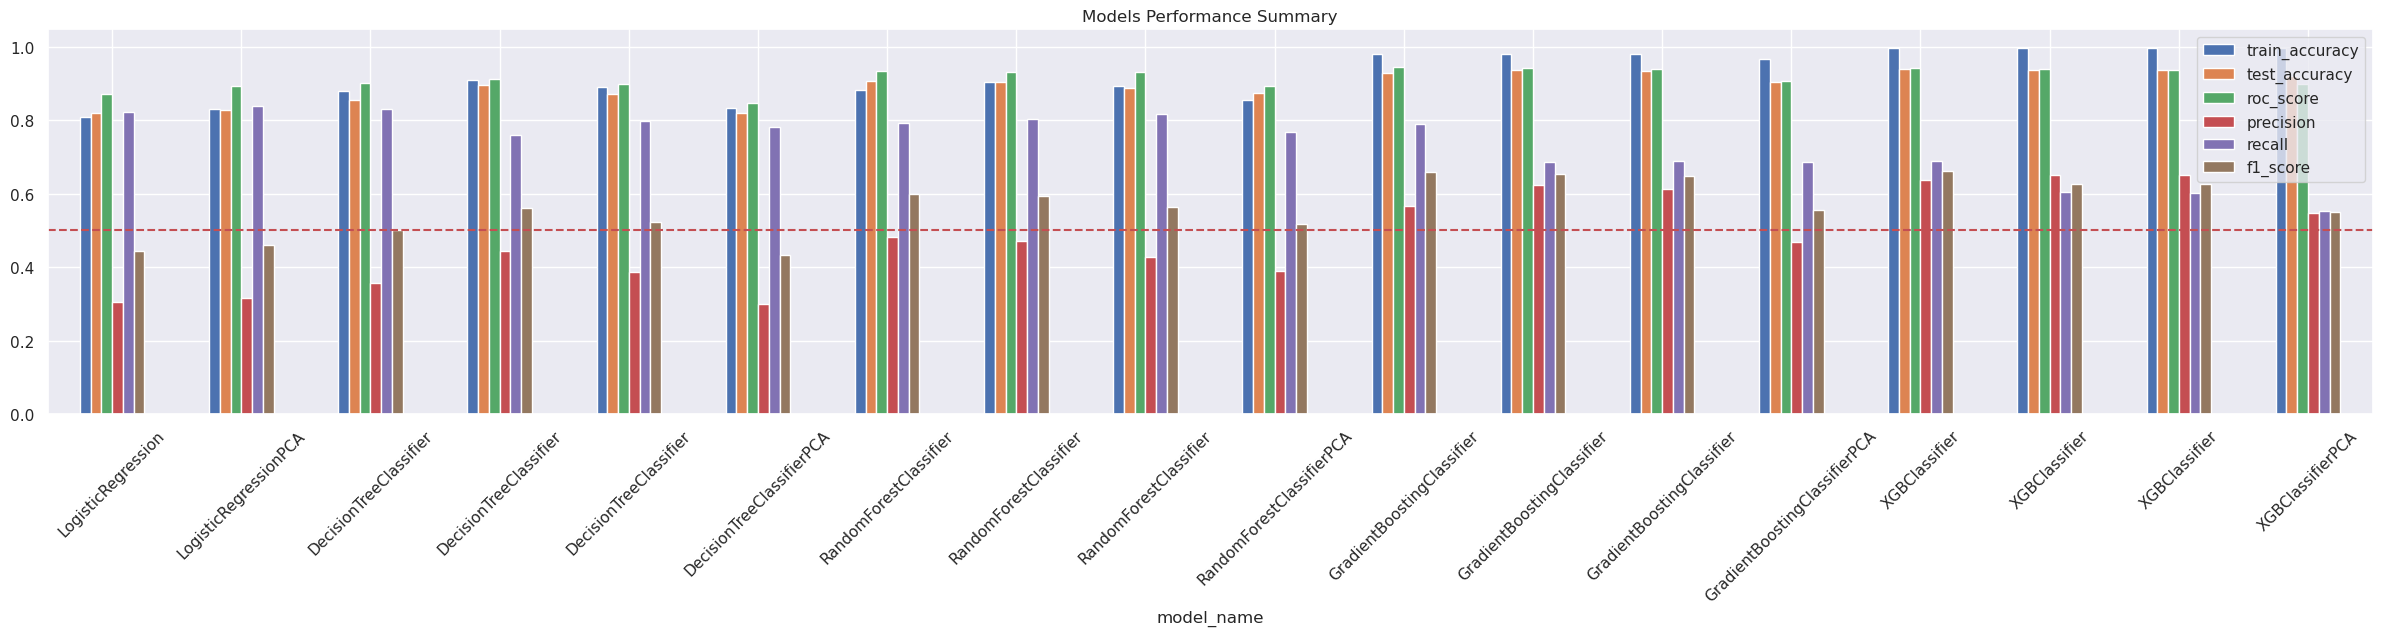

In [126]:
# Plot the Barplot and evaluate the performance of various models.  
overall_summary_df.set_index('model_name').plot.bar(figsize=(30,5))
plt.hlines(xmin=-0.5,xmax=30,y=0.5, color='r',linestyles='--')
plt.xticks(rotation=45)
plt.title('Models Performance Summary')
plt.show();